# Data Pre-processing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from IPython.core.interactiveshell import InteractiveShell  
InteractiveShell.ast_node_interactivity = "all"

In [3]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 200)

# POLICIES BY STATE

## DATA EXPLORATION

In [4]:
df = pd.read_excel('COVID19_US_state_policy_database.xlsx')
df.head()
df.shape

,COVID-19 US state policy database (CUSP),Unnamed: 1,Unnamed: 2
0,NaN,NaN,NaN
1,NaN,NaN,NaN
2,Last date of comprehensive review: 7/14/2020,NaN,NaN
3,Link to data in xlsx format:,https://github.com/KristenNocka/COVID-19-US-St...,NaN
4,Table of Contents,NaN,NaN


(179, 3)

In [5]:
xls_file = pd.ExcelFile('COVID19_US_state_policy_database.xlsx')
xls_file

### Load data from each excel sheet

In [6]:
sheet_names=xls_file.sheet_names
sheet_names

['Information',
 'State of Emergency',
 'Physical Distance Closures',
 'Stay at Home',
 'Reopening',
 '2nd Closures',
 'Face Masks',
 'Quarantine Rules',
 'Alcohol and Firearms',
 'Housing',
 'Unemployment Insurance',
 'Food Security',
 'Healthcare Delivery',
 'Racial Disparities',
 'Incarcerated Individuals',
 'Substance Use Disorder Policies',
 'Pre-Covid Policies',
 'State Characteristics',
 'NotesDetails']

#### State of Emergency

In [7]:
State_of_Emergency = xls_file.parse('State of Emergency')
State_of_Emergency.shape
State_of_Emergency.dropna(inplace=True)
State_of_Emergency.tail()

(52, 4)

,State,State Abbreviation,State FIPS Code,State of emergency
46,Virginia,VA,51.0,2020-03-12 00:00:00
47,Washington,WA,53.0,2020-02-29 00:00:00
48,West Virginia,WV,54.0,2020-03-16 00:00:00
49,Wisconsin,WI,55.0,2020-03-12 00:00:00
50,Wyoming,WY,56.0,2020-03-13 00:00:00


In [8]:
State_of_Emergency['State of emergency'] = pd.to_datetime(State_of_Emergency['State of emergency'], errors='coerce')

#### Pre-Covid Policies

In [9]:
Pre_Covid_Policies = xls_file.parse('Pre-Covid Policies')
Pre_Covid_Policies.shape
Pre_Covid_Policies.dropna(inplace =True)
Pre_Covid_Policies.tail()

(52, 5)

,State,State Abbreviation,State FIPS Code,Paid sick leave,Medicaid Expansion
46,Virginia,VA,51.0,0,1
47,Washington,WA,53.0,1,1
48,West Virginia,WV,54.0,0,1
49,Wisconsin,WI,55.0,0,0
50,Wyoming,WY,56.0,0,0


#### Food Security

In [10]:
Food_Security= xls_file.parse('Food Security')
Food_Security.dropna(inplace=True)
Food_Security.shape
Food_Security.tail()

(51, 7)

,State,State Abbreviation,State FIPS Code,SNAP Waiver-Emergency Allotments to Current SNAP Households,SNAP Waiver-Pandemic EBT,SNAP Waiver-Temporary Suspension of Claims Collection,2020 Q1 SNAP ABAWD Time Limit Waiver
46,Virginia,VA,51.0,2020-03-24 00:00:00,2020-04-25 00:00:00,2020-04-13 00:00:00,1
47,Washington,WA,53.0,2020-03-27 00:00:00,2020-05-22 00:00:00,0,1
48,West Virginia,WV,54.0,2020-03-27 00:00:00,2020-04-30 00:00:00,0,1
49,Wisconsin,WI,55.0,2020-04-01 00:00:00,2020-04-22 00:00:00,0,1
50,Wyoming,WY,56.0,2020-04-01 00:00:00,2020-04-16 00:00:00,0,0


In [11]:
# to standardise the policy date, this function will subtract the dates from the state of emergency date.All dates will reflect the 
# number of days the policy made after the state of emergency date
def change_date(df,list):
    df = pd.merge(df, State_of_Emergency, on=['State','State FIPS Code','State Abbreviation'],how='left')
    for col in list:
        df[col] = pd.to_datetime(df[col], errors='coerce')
        df[col] = (df[col] - df['State of emergency']).dt.days
    df.fillna(value = 0 , inplace = True)  
    return df

In [12]:
Food_Security.columns

Index(['State', 'State Abbreviation', 'State FIPS Code',
       'SNAP Waiver-Emergency Allotments to Current SNAP Households',
       'SNAP Waiver-Pandemic EBT',
       'SNAP Waiver-Temporary Suspension of Claims Collection',
       '2020 Q1 SNAP ABAWD Time Limit Waiver'],
      dtype='object')

In [13]:
Food_Security_dates = ['SNAP Waiver-Emergency Allotments to Current SNAP Households','SNAP Waiver-Pandemic EBT',
       'SNAP Waiver-Temporary Suspension of Claims Collection']

In [14]:
Food_Security_dates_updated =change_date(Food_Security,Food_Security_dates)
Food_Security_dates_updated.tail()

,State,State Abbreviation,State FIPS Code,SNAP Waiver-Emergency Allotments to Current SNAP Households,SNAP Waiver-Pandemic EBT,SNAP Waiver-Temporary Suspension of Claims Collection,2020 Q1 SNAP ABAWD Time Limit Waiver,State of emergency
46,Virginia,VA,51.0,12,44.0,32.0,1,2020-03-12
47,Washington,WA,53.0,27,83.0,0.0,1,2020-02-29
48,West Virginia,WV,54.0,11,45.0,0.0,1,2020-03-16
49,Wisconsin,WI,55.0,20,41.0,0.0,1,2020-03-12
50,Wyoming,WY,56.0,19,34.0,0.0,0,2020-03-13


#### Stay at Home

In [15]:
Stay_at_Home = xls_file.parse('Stay at Home')
Stay_at_Home.dropna(inplace=True)
Stay_at_Home.tail()
Stay_at_Home.shape

,State,State Abbreviation,State FIPS Code,Stay at home/ shelter in place,Religious Gatherings Exempt Without Clear Social Distance Mandate*
46,Virginia,VA,51.0,2020-03-30 00:00:00,0
47,Washington,WA,53.0,2020-03-23 00:00:00,0
48,West Virginia,WV,54.0,2020-03-24 00:00:00,1
49,Wisconsin,WI,55.0,2020-03-25 00:00:00,0
50,Wyoming,WY,56.0,0,0


(51, 5)

In [16]:
Stay_at_Home.columns

Index(['State', 'State Abbreviation', 'State FIPS Code',
       'Stay at home/ shelter in place',
       'Religious Gatherings Exempt Without Clear Social Distance Mandate*'],
      dtype='object')

In [17]:
Stay_at_Home_dates =['Stay at home/ shelter in place']
Stay_at_Home_dates_updated= change_date(Stay_at_Home,Stay_at_Home_dates)      

#### Physical Distance Closures

In [18]:
Physical_Distance_Closures = xls_file.parse('Physical Distance Closures')
Physical_Distance_Closures.dropna(inplace=True)
Physical_Distance_Closures.shape
Physical_Distance_Closures.tail()

(51, 11)

,State,State Abbreviation,State FIPS Code,Date closed K-12 schools,Closed day cares,Date banned visitors to nursing homes,Closed non-essential businesses,Closed restaurants except take out,Closed gyms,Closed movie theaters,Closed Bars
46,Virginia,VA,51.0,2020-03-16 00:00:00,0,0,0,2020-03-25 00:00:00,2020-03-25 00:00:00,2020-03-25 00:00:00,2020-03-24 00:00:00
47,Washington,WA,53.0,2020-03-17 00:00:00,0,2020-03-16 00:00:00,2020-03-25 00:00:00,2020-03-16 00:00:00,2020-03-16 00:00:00,2020-03-16 00:00:00,2020-03-16 00:00:00
48,West Virginia,WV,54.0,2020-03-16 00:00:00,2020-03-26 00:00:00,0,2020-03-24 00:00:00,2020-03-18 00:00:00,2020-03-19 00:00:00,2020-03-24 00:00:00,2020-03-18 00:00:00
49,Wisconsin,WI,55.0,2020-03-18 00:00:00,0,0,2020-03-25 00:00:00,2020-03-17 00:00:00,2020-03-25 00:00:00,2020-03-25 00:00:00,2020-03-17 00:00:00
50,Wyoming,WY,56.0,2020-03-19 00:00:00,2020-03-19 00:00:00,0,0,2020-03-19 00:00:00,2020-03-19 00:00:00,2020-03-19 00:00:00,2020-03-19 00:00:00


In [19]:
Physical_Distance_Closures.columns

Index(['State', 'State Abbreviation', 'State FIPS Code',
       'Date closed K-12 schools', 'Closed day cares',
       'Date banned visitors to nursing homes',
       'Closed non-essential businesses', 'Closed restaurants except take out',
       'Closed gyms', 'Closed movie theaters', 'Closed Bars'],
      dtype='object')

In [20]:
Physical_Distance_Closures_dates=['Date closed K-12 schools', 'Closed day cares','Date banned visitors to nursing homes','Closed non-essential businesses', 'Closed restaurants except take out',
       'Closed gyms', 'Closed movie theaters', 'Closed Bars']

In [21]:
Physical_Distance_Closures_dates_updated =change_date(Physical_Distance_Closures,Physical_Distance_Closures_dates)

#### Reopening

In [22]:
Reopening=xls_file.parse('Reopening')
Reopening.dropna(inplace=True)
Reopening.shape
Reopening.tail()

(51, 16)

,State,State Abbreviation,State FIPS Code,End/relax stay at home/shelter in place,Began to reopen businesses statewide,Reopen restaurants,Initially reopen restaurants for outdoor dining only,Reopened gyms,Reopened movie theaters,Reopened hair salons/barber shops,Reopen non-essential construction,Reopen Religious gatherings,Reopen non-essential retail,Reopen bars,Reopen Childcare,Resumed elective medical procedures
46,Virginia,VA,51.0,2020-06-05 00:00:00,2020-05-29 00:00:00,2020-05-29 00:00:00,1.0,2020-06-12 00:00:00,2020-07-01 00:00:00,2020-05-15 00:00:00,0,2020-05-15 00:00:00,2020-05-28 00:00:00,2020-06-12 00:00:00,0,2020-05-01 00:00:00
47,Washington,WA,53.0,2020-06-01 00:00:00,2020-05-05 00:00:00,0,0.0,0,0,0,0,2020-05-27 00:00:00,0,0,0,2020-04-29 00:00:00
48,West Virginia,WV,54.0,2020-05-04 00:00:00,2020-05-04 00:00:00,2020-05-04 00:00:00,1.0,2020-05-18 00:00:00,2020-06-05 00:00:00,2020-05-04 00:00:00,0,0,2020-05-21 00:00:00,2020-05-26 00:00:00,2020-04-30 00:00:00,2020-04-20 00:00:00
49,Wisconsin,WI,55.0,2020-05-13 00:00:00,2020-05-11 00:00:00,2020-05-13 00:00:00,0.0,2020-05-13 00:00:00,2020-05-13 00:00:00,2020-05-13 00:00:00,0,2020-05-13 00:00:00,2020-05-11 00:00:00,2020-05-13 00:00:00,0,0
50,Wyoming,WY,56.0,0,2020-05-01 00:00:00,2020-05-15 00:00:00,0.0,2020-05-01 00:00:00,2020-05-15 00:00:00,2020-05-01 00:00:00,0,2020-06-15 00:00:00,0,2020-05-15 00:00:00,2020-04-28 00:00:00,0


In [23]:
Reopening.columns

Index(['State', 'State Abbreviation', 'State FIPS Code',
       'End/relax stay at home/shelter in place',
       'Began to reopen businesses statewide', 'Reopen restaurants',
       'Initially reopen restaurants for outdoor dining only', 'Reopened gyms',
       'Reopened movie theaters', 'Reopened hair salons/barber shops',
       'Reopen non-essential construction', 'Reopen Religious gatherings',
       'Reopen non-essential retail', 'Reopen bars', 'Reopen Childcare',
       'Resumed elective medical procedures'],
      dtype='object')

In [24]:
Reopening_dates =['End/relax stay at home/shelter in place',
       'Began to reopen businesses statewide', 'Reopen restaurants',
       'Reopened gyms','Reopen non-essential construction',
       'Reopened movie theaters', 'Reopened hair salons/barber shops',
       'Reopen Religious gatherings',
       'Reopen non-essential retail', 'Reopen bars', 'Reopen Childcare',
       'Resumed elective medical procedures']
Reopening_dates_updated=change_date(Reopening, Reopening_dates)

#### Face Masks

In [25]:
Face_Masks=xls_file.parse('Face Masks')
Face_Masks.dropna(inplace=True)
Face_Masks.shape
Face_Masks.tail()

(51, 8)

,State,State Abbreviation,State FIPS Code,Mandate face mask use by all individuals in public spaces,Face mask mandate enforced by fines,Face mask mandate enforced by criminal charge/citation,No legal enforcement of face mask mandate,Mandate face mask use by employees in public-facing businesses
46,Virginia,VA,51.0,2020-05-29 00:00:00,0,1,0,2020-05-29 00:00:00
47,Washington,WA,53.0,2020-06-26 00:00:00,0,0,1,2020-05-04 00:00:00
48,West Virginia,WV,54.0,2020-07-07 00:00:00,0,0,1,2020-05-04 00:00:00
49,Wisconsin,WI,55.0,0,0,0,0,0
50,Wyoming,WY,56.0,0,0,0,0,2020-05-01 00:00:00


In [26]:
Face_Masks.columns

Index(['State', 'State Abbreviation', 'State FIPS Code',
       'Mandate face mask use by all individuals in public spaces',
       'Face mask mandate enforced by fines',
       'Face mask mandate enforced by criminal charge/citation',
       'No legal enforcement of face mask mandate',
       'Mandate face mask use by employees in public-facing businesses'],
      dtype='object')

In [27]:
Face_Masks_dates= ['Mandate face mask use by all individuals in public spaces',
                   'Mandate face mask use by employees in public-facing businesses']
Face_Masks_dates_updated=change_date(Face_Masks,Face_Masks_dates)

#### Second Closures

In [28]:
Second_Closures=xls_file.parse('2nd Closures')
Second_Closures.dropna(inplace=True)
Second_Closures.shape
Second_Closures.tail()

(51, 8)

,State,State Abbreviation,State FIPS Code,Begin to Re-Close Bars,Re-Close Bars (statewide),Re-Close Movie Theaters (statewide),Re-Close Gyms (statewide),Re-Close Indoor Dining (Statewide)
46,Virginia,VA,51.0,0,0,0,0,0
47,Washington,WA,53.0,0,0,0,0,0
48,West Virginia,WV,54.0,2020-07-14 00:00:00,0,0,0,0
49,Wisconsin,WI,55.0,0,0,0,0,0
50,Wyoming,WY,56.0,0,0,0,0,0


In [29]:
Second_Closures.columns

Index(['State', 'State Abbreviation', 'State FIPS Code',
       'Begin to Re-Close Bars', 'Re-Close Bars (statewide)',
       'Re-Close Movie Theaters (statewide)', 'Re-Close Gyms (statewide)',
       'Re-Close Indoor Dining (Statewide)'],
      dtype='object')

In [30]:
Second_Closures_dates = ['Begin to Re-Close Bars', 'Re-Close Bars (statewide)',
       'Re-Close Movie Theaters (statewide)', 'Re-Close Gyms (statewide)',
       'Re-Close Indoor Dining (Statewide)']
Second_Closures_dates_updated = change_date(Second_Closures,Second_Closures_dates)

#### Quarantine Rules

In [31]:
Quarantine_Rules=xls_file.parse('Quarantine Rules')
Quarantine_Rules.dropna(inplace=True)
Quarantine_Rules.shape
Quarantine_Rules.tail()

(51, 5)

,State,State Abbreviation,State FIPS Code,Mandate quarantine for those entering the state from specific states,Mandate quarantine for all individuals entering the state from another state
46,Virginia,VA,51.0,0,0
47,Washington,WA,53.0,0,0
48,West Virginia,WV,54.0,2020-03-31 00:00:00,0
49,Wisconsin,WI,55.0,0,0
50,Wyoming,WY,56.0,0,2020-04-03 00:00:00


In [32]:
Quarantine_Rules.columns

Index(['State', 'State Abbreviation', 'State FIPS Code',
       'Mandate quarantine for those entering the state from specific states',
       'Mandate quarantine for all individuals entering the state from another state'],
      dtype='object')

In [33]:
Quarantine_Rules_dates=['Mandate quarantine for those entering the state from specific states',
       'Mandate quarantine for all individuals entering the state from another state']
Quarantine_Rules_dates_updated=change_date(Quarantine_Rules,Quarantine_Rules_dates)

#### Alcohol and Firearms

In [34]:
Alcohol_and_Firearms=xls_file.parse('Alcohol and Firearms')
Alcohol_and_Firearms.dropna(inplace=True)
Alcohol_and_Firearms.shape
Alcohol_and_Firearms.tail()

(51, 7)

,State,State Abbreviation,State FIPS Code,Alcohol/Liquor Stores Open,Allow restaurants to sell takeout alcohol,Allow restaurants to deliver alcohol,Keep Firearms Sellers Open
46,Virginia,VA,51.0,1,2020-03-16 00:00:00,2020-03-19 00:00:00,1
47,Washington,WA,53.0,1,2020-03-24 00:00:00,2020-03-24 00:00:00,0
48,West Virginia,WV,54.0,1,2020-03-18 00:00:00,2020-03-18 00:00:00,1
49,Wisconsin,WI,55.0,1,2020-03-20 00:00:00,0,1
50,Wyoming,WY,56.0,1,2020-03-30 00:00:00,0,1


In [35]:
Alcohol_and_Firearms.columns

Index(['State', 'State Abbreviation', 'State FIPS Code',
       'Alcohol/Liquor Stores Open',
       'Allow restaurants to sell takeout alcohol ',
       'Allow restaurants to deliver alcohol', 'Keep Firearms Sellers Open'],
      dtype='object')

In [36]:
Alcohol_and_Firearms_dates= ['Allow restaurants to sell takeout alcohol ',
       'Allow restaurants to deliver alcohol']
Alcohol_and_Firearms_dates_updated= change_date(Alcohol_and_Firearms,Alcohol_and_Firearms_dates)

#### Housing

In [37]:
Housing=xls_file.parse('Housing')
Housing.dropna(inplace=True)
Housing.shape
Housing.tail()

(51, 9)

,State,State Abbreviation,State FIPS Code,Stop Initiation of Evictions overall or due to COVID related issues,Stop enforcement of evictions overall or due to COVID related issues,Renter grace period or use of security deposit to pay rent,Order freezing utility shut offs,Froze mortgage payments,Lift Eviction Moratorium
46,Virginia,VA,51.0,0,2020-06-08 00:00:00,0,2020-03-16 00:00:00,0,2020-06-28 00:00:00
47,Washington,WA,53.0,2020-03-18 00:00:00,2020-03-18 00:00:00,0,2020-03-18 00:00:00,0,0
48,West Virginia,WV,54.0,2020-03-23 00:00:00,0,0,0,0,2020-05-15 00:00:00
49,Wisconsin,WI,55.0,2020-03-27 00:00:00,2020-03-27 00:00:00,0,2020-03-22 00:00:00,0,2020-05-26 00:00:00
50,Wyoming,WY,56.0,0,0,2020-05-20 00:00:00,0,0,0


In [38]:
Housing.columns

Index(['State', 'State Abbreviation', 'State FIPS Code',
       'Stop Initiation of Evictions overall or due to COVID related issues',
       'Stop enforcement of evictions overall or due to COVID related issues',
       'Renter grace period or use of security deposit to pay rent',
       'Order freezing utility shut offs', 'Froze mortgage payments',
       'Lift Eviction Moratorium'],
      dtype='object')

In [39]:
Housing_dates=['Stop Initiation of Evictions overall or due to COVID related issues',
       'Stop enforcement of evictions overall or due to COVID related issues',
       'Renter grace period or use of security deposit to pay rent',
       'Order freezing utility shut offs', 'Froze mortgage payments',
       'Lift Eviction Moratorium']
Housing_dates_updated=change_date(Housing, Housing_dates)
Housing_dates_updated.tail()

,State,State Abbreviation,State FIPS Code,Stop Initiation of Evictions overall or due to COVID related issues,Stop enforcement of evictions overall or due to COVID related issues,Renter grace period or use of security deposit to pay rent,Order freezing utility shut offs,Froze mortgage payments,Lift Eviction Moratorium,State of emergency
46,Virginia,VA,51.0,0.0,88.0,0.0,4.0,0.0,108.0,2020-03-12
47,Washington,WA,53.0,18.0,18.0,0.0,18.0,0.0,0.0,2020-02-29
48,West Virginia,WV,54.0,7.0,0.0,0.0,0.0,0.0,60.0,2020-03-16
49,Wisconsin,WI,55.0,15.0,15.0,0.0,10.0,0.0,75.0,2020-03-12
50,Wyoming,WY,56.0,0.0,0.0,68.0,0.0,0.0,0.0,2020-03-13


#### Unemployment Insurance

In [40]:
Unemployment_Insurance=xls_file.parse('Unemployment Insurance')
Unemployment_Insurance.dropna(inplace=True)
Unemployment_Insurance.shape
Unemployment_Insurance.tail()

(51, 14)

,State,State Abbreviation,State FIPS Code,"Prior to pandemic, no state unemployment waiting period; or date waiting period waived not found",Waived one week waiting period for unemployment insurance,Waive work search requirement for unemployment insurance,Expand eligibility of unemployment insurance to anyonewho is quarantined and/or taking care of someone who is quarantined,Expand eligibility to high-risk individuals in preventative quarantine,Expand eligibility of unemployment insurance to those who have lost childcare/school closures,Extend the amount of time an individual can be on unemployment insurance,Weekly unemployment insurance maximum amount (dollars),"Weekly unemployment insurance maximum amount with extra stimulus (through July 21, 2020) (dollars)",Unemployment insurance maximum duration (weeks),Unemployment insurance maximum duration with Pandemic Emergency Unemployment Compensation CARES extension (weeks)
46,Virginia,VA,51.0,0,2020-03-17 00:00:00,1,1,0,1,0,378.0,978.0,26.0,39.0
47,Washington,WA,53.0,0,2020-03-18 00:00:00,1,1,1,0,0,790.0,1390.0,26.0,39.0
48,West Virginia,WV,54.0,0,2020-03-19 00:00:00,1,1,0,0,0,424.0,1024.0,26.0,39.0
49,Wisconsin,WI,55.0,0,0,1,1,0,1,0,370.0,970.0,26.0,39.0
50,Wyoming,WY,56.0,1,0,1,0,0,0,0,508.0,1108.0,26.0,39.0


In [41]:
Unemployment_Insurance_dates= ['Waived one week waiting period for unemployment insurance']
Unemployment_Insurance_dates_updated= change_date(Unemployment_Insurance,Unemployment_Insurance_dates)

#### Healthcare Delivery

In [42]:
Healthcare_Delivery=xls_file.parse('Healthcare Delivery')
Healthcare_Delivery.dropna(inplace=True)
Healthcare_Delivery.shape
Healthcare_Delivery.tail()

(51, 12)

,State,State Abbreviation,State FIPS Code,Modify Medicaid requirements with 1135 waivers (date of CMS approval),Reopened ACA enrollment using a special enrollment period,State previously allowed audio-only telehealth,Allow audio-only telehealth,Allow/expand Medicaid telehealth coverage,State had CHIP premium non-payment lock-out period as of January 2019,Supend CHIP premium non-payment lock-outs,Suspended elective medical/dental procedures,Made Effort to Limit Abortion Access
46,Virginia,VA,51.0,2020-03-23 00:00:00,0,0,2020-03-19 00:00:00,2020-03-19 00:00:00,0,0,2020-03-25 00:00:00,0
47,Washington,WA,53.0,2020-03-19 00:00:00,2020-03-10 00:00:00,0,2020-03-25 00:00:00,2020-03-25 00:00:00,1,0,2020-03-19 00:00:00,0
48,West Virginia,WV,54.0,2020-03-30 00:00:00,0,0,2020-03-16 00:00:00,2020-03-17 00:00:00,0,0,2020-04-01 00:00:00,1
49,Wisconsin,WI,55.0,2020-04-20 00:00:00,0,0,2020-03-17 00:00:00,2020-03-12 00:00:00,1,0,0,0
50,Wyoming,WY,56.0,2020-03-27 00:00:00,0,0,0,0,0,0,0,0


In [43]:
Healthcare_Delivery.columns

Index(['State', 'State Abbreviation', 'State FIPS Code',
       'Modify Medicaid requirements with 1135 waivers (date of CMS approval)',
       'Reopened ACA enrollment using a special enrollment period',
       'State previously allowed audio-only telehealth',
       'Allow audio-only telehealth',
       'Allow/expand Medicaid telehealth coverage',
       'State had CHIP premium non-payment lock-out period as of January 2019',
       'Supend CHIP premium non-payment lock-outs',
       'Suspended elective medical/dental procedures',
       'Made Effort to Limit Abortion Access'],
      dtype='object')

In [44]:
Healthcare_Delivery_dates=['Modify Medicaid requirements with 1135 waivers (date of CMS approval)',
       'Reopened ACA enrollment using a special enrollment period',
       'Allow audio-only telehealth',
       'Allow/expand Medicaid telehealth coverage',
       'Suspended elective medical/dental procedures']
Healthcare_Delivery_dates_updated=change_date(Healthcare_Delivery,Healthcare_Delivery_dates)

#### Racial_Disparities

In [45]:
Racial_Disparities=xls_file.parse('Racial Disparities')
Racial_Disparities.shape
Racial_Disparities.dropna(inplace=True)
Racial_Disparities.tail()

(53, 28)

,State,State Abbreviation,State FIPS Code,Report testing by race/ethnicity,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Report cases by race/ethnicity,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Report hospitalizations by race/ethnicity,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Report deaths by race/ethnicity,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Report COVID testing for American Indian/Alaska Native individuals (July),Report positive COVID tests for American Indian/Alaska Native individuals (July),Report COVID hospitalizations for American Indian/Alaska Native individuals (July),Report COVID deaths for American Indian/Alaska Native individuals (July),State has at least one American Indian/Alaskan Native reservation (July)
47,Virginia,VA,51.0,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,1,1,1,1,1,1.0,1.0,0.0,1.0,1.0
48,Washington,WA,53.0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1.0,1.0,1.0,1.0,1.0
49,West Virginia,WV,54.0,1,1,1,1,1,1,1,1,1,1,1,0,0,1,1,1,0,0,0,0,0.0,0.0,0.0,0.0,0.0
50,Wisconsin,WI,55.0,1,0,0,0,0,1,1,1,1,1,1,0,0,0,0,1,1,1,1,1,1.0,1.0,0.0,1.0,1.0
51,Wyoming,WY,56.0,0,0,0,0,0,1,1,1,1,1,0,0,0,0,0,1,0,0,0,0,0.0,1.0,0.0,1.0,1.0


In [46]:
Racial_Disparities['Report testing by race/ethnicity'].value_counts()

1    41
0    10
Name: Report testing by race/ethnicity, dtype: int64

#### Incarcerated Individuals

In [47]:
Incarcerated_Individuals=xls_file.parse('Incarcerated Individuals')
Incarcerated_Individuals.shape
Incarcerated_Individuals.dropna(inplace=True)
Incarcerated_Individuals.tail()

(52, 9)

,State,State Abbreviation,State FIPS Code,Stopped personal visitation in state prisons,Stopped in-person attorney visits in state prisons,Does not charge copays for incarcerated individuals,Waived COVID/respiratory illness-related copays during pandemic for incarcerated individuals,Waived all copays during pandemic for incarcerated individuals,Did not waive copays for incarcerated individuals
46,Virginia,VA,51.0,2020-03-13 00:00:00,2020-03-13 00:00:00,1,0,0,0
47,Washington,WA,53.0,2020-03-13 00:00:00,0,0,1,0,0
48,West Virginia,WV,54.0,2020-03-11 00:00:00,0,0,0,1,0
49,Wisconsin,WI,55.0,2020-03-13 00:00:00,0,0,1,0,0
50,Wyoming,WY,56.0,2020-03-18 00:00:00,0,1,0,0,0


In [48]:
Incarcerated_Individuals.columns

Index(['State', 'State Abbreviation', 'State FIPS Code',
       'Stopped personal visitation in state prisons',
       'Stopped in-person attorney visits in state prisons',
       'Does not charge copays for incarcerated individuals',
       'Waived COVID/respiratory illness-related copays during pandemic for incarcerated individuals',
       'Waived all copays during pandemic for incarcerated individuals',
       'Did not waive copays for incarcerated individuals'],
      dtype='object')

In [49]:
Incarcerated_Individuals_dates=['Stopped personal visitation in state prisons',
       'Stopped in-person attorney visits in state prisons']
Incarcerated_Individuals_dates_updated =change_date(Incarcerated_Individuals,Incarcerated_Individuals_dates)
Incarcerated_Individuals_dates_updated.tail()

,State,State Abbreviation,State FIPS Code,Stopped personal visitation in state prisons,Stopped in-person attorney visits in state prisons,Does not charge copays for incarcerated individuals,Waived COVID/respiratory illness-related copays during pandemic for incarcerated individuals,Waived all copays during pandemic for incarcerated individuals,Did not waive copays for incarcerated individuals,State of emergency
46,Virginia,VA,51.0,1,1.0,1,0,0,0,2020-03-12
47,Washington,WA,53.0,13,0.0,0,1,0,0,2020-02-29
48,West Virginia,WV,54.0,-5,0.0,0,0,1,0,2020-03-16
49,Wisconsin,WI,55.0,1,0.0,0,1,0,0,2020-03-12
50,Wyoming,WY,56.0,5,0.0,1,0,0,0,2020-03-13


#### Substance Use Disorder Policies

In [50]:
Substance_Use_Disorder_Policies=xls_file.parse('Substance Use Disorder Policies')
Substance_Use_Disorder_Policies.dropna(inplace=True)
Substance_Use_Disorder_Policies.shape
Substance_Use_Disorder_Policies.tail()

(51, 9)

,State,State Abbreviation,State FIPS Code,Use of telemedicine/telephone evaluations to initiate buprenorphine prescribing,Patients can receive 14-28 take-home doses of opioid medication,Home delivery of take-home medication by opioid treatment programs,Use of telemedicine for schedule II-V prescriptions,Exceptions to emergency oral prescriptions,Waive requirement to obtain separate DEA registration to dispense outside home state
46,Virginia,VA,51.0,0,0,0,0,0,0
47,Washington,WA,53.0,0,0,0,0,0,0
48,West Virginia,WV,54.0,0,0,0,2020-03-31 00:00:00,2020-03-31 00:00:00,0
49,Wisconsin,WI,55.0,0,0,0,0,0,0
50,Wyoming,WY,56.0,0,0,0,0,0,0


In [51]:
Substance_Use_Disorder_Policies.columns

Index(['State', 'State Abbreviation', 'State FIPS Code',
       'Use of telemedicine/telephone evaluations to initiate buprenorphine prescribing',
       'Patients can receive 14-28 take-home doses of opioid medication',
       'Home delivery of take-home medication by opioid treatment programs',
       'Use of telemedicine for schedule II-V prescriptions',
       'Exceptions to emergency oral prescriptions',
       'Waive requirement to obtain separate DEA registration to dispense outside home state'],
      dtype='object')

In [52]:
Substance_Use_Disorder_Policies_dates =['Use of telemedicine/telephone evaluations to initiate buprenorphine prescribing',
       'Patients can receive 14-28 take-home doses of opioid medication',
       'Home delivery of take-home medication by opioid treatment programs',
       'Use of telemedicine for schedule II-V prescriptions',
       'Exceptions to emergency oral prescriptions',
       'Waive requirement to obtain separate DEA registration to dispense outside home state']
Substance_Use_Disorder_Policies_dates_updated=change_date(Substance_Use_Disorder_Policies,Substance_Use_Disorder_Policies_dates)
Substance_Use_Disorder_Policies_dates_updated.head()

,State,State Abbreviation,State FIPS Code,Use of telemedicine/telephone evaluations to initiate buprenorphine prescribing,Patients can receive 14-28 take-home doses of opioid medication,Home delivery of take-home medication by opioid treatment programs,Use of telemedicine for schedule II-V prescriptions,Exceptions to emergency oral prescriptions,Waive requirement to obtain separate DEA registration to dispense outside home state,State of emergency
0,Alabama,AL,1.0,0.0,0.0,0.0,7.0,0.0,0.0,2020-03-13
1,Alaska,AK,2.0,0.0,0.0,0.0,0.0,0.0,0.0,2020-03-11
2,Arizona,AZ,4.0,0.0,0.0,0.0,0.0,0.0,0.0,2020-03-11
3,Arkansas,AR,5.0,0.0,0.0,0.0,0.0,0.0,0.0,2020-03-11
4,California,CA,6.0,0.0,0.0,0.0,0.0,0.0,0.0,2020-03-04


#### State_Characteristics

In [53]:
State_Characteristics=xls_file.parse('State Characteristics')
State_Characteristics.dropna(inplace=True)
State_Characteristics.shape
State_Characteristics.tail()

(51, 11)

,State,State Abbreviation,State FIPS Code,Population density per square miles,Population 2018,Square Miles,Number Homeless (2019),Percent Unemployed (2018),Percent living under the federal poverty line (2018),Percent at risk for serious illness due to COVID,All-cause deaths 2018
46,Virginia,VA,51,199.13,8517685,42775.0,5783,4.2,10.7,35.9,69359
47,Washington,WA,53,105.69,7535591,71298.0,21577,4.3,10.3,35.1,56877
48,West Virginia,WV,54,74.53,1805832,24230.0,1397,5.8,17.8,49.3,23478
49,Wisconsin,WI,55,88.76,5813568,65496.0,4538,3.2,11.0,36.5,53684
50,Wyoming,WY,56,5.91,577737,97813.0,548,3.9,11.1,36.4,5070


In [54]:
NotesDetails=xls_file.parse('NotesDetails')
NotesDetails.dropna(inplace=True)
NotesDetails.shape
NotesDetails.tail()

(0, 102)

,Unnamed: 0,State of emergency,Date closed K-12 schools,Closed day cares,Reopened Childcare,Date banned visitors to nursing homes,Stay at home/ shelter in place,End/relax stay at home/shelter in place,Closed non-essential businesses,Began to reopen businesses,Religious Gatherings Exempt Without Clear Social Distance Mandate*,Mandate face mask use by all individuals in public spaces,Face mask mandate enforced by fines,Face mask mandate enforced by criminal charge/citation,No legal enforcement of face mask mandate,Mandate face mask use by employees in public-facing businesses,Alcohol/Liquor Stores Open,Allow restaurants to sell takeout alcohol,Allow restaurants to deliver alcohol,Keep Firearms Sellers Open,Closed restaurants except take out,Reopen restaurants,Closed gyms,Reopened gyms,Closed movie theaters,Reopened movie theaters,Closed Bars,Reopened hair salons/barber shops,Non-essential construction,Reopen Religious Gatherings,Reopen non-essential retail,Reopen bars,Begin to reclose bars,Reclose bars (statewide),Relcose movie theaters (statewide),Reclose gyms (statewide),Reclose indoor dining (statewide),Mandate quarantine for those entering the state from specific states,Mandate quarantine for all individuals entering the state from another state,Stop Initiation of Evictions overall or due to COVID related issues,Stop enforcement of evictions overall or due to COVID related issues,Renter grace period or use of security deposit to pay rent,Order freezing utility shut offs,Froze mortgage payments,Lift Eviction Moratorium,SNAP Waiver-Emergency Allotments to Current SNAP Households,SNAP Waiver-Pandemic EBT,SNAP Waiver-Temporary Suspension of Claims Collection,2020 Q1 SNAP ABAWD Time Limit Waiver,Modify Medicaid requirements with 1135 waivers (date of CMS approval),Reopened ACA enrollment using a special enrollment period,State previously allowed audio-only telehealth,Allow audio-only telehealth,Allow/expand Medicaid telehealth coverage,State had CHIP premium non-payment lock-out period as of January 2019,Supend CHIP premium non-payment lock-outs,Report testing by race/ethnicity,Report cases by race/ethnicity,Report hospitalizations by race/ethnicity,Report deaths by race/ethnicity,Report COVID testing for Native Amerian/Alaska Native individuals,Report positive COVID tests for Native Amerian/Alaska Native individuals,Report COVID hospitalizations for Native Amerian/Alaska Native individuals,Report COVID deaths for Native Amerian/Alaska Native individuals,State has at least one American Indian/Alaskan Native reservation,Stopped personal visitation in state prisons,Stopped in-person attorney visits in state prisons,Does not charge copays for incarcerated individuals,Waived COVID/respiratory illness-related copays during pandemic for incarcerated individuals,Waived all copays during pandemic for incarcerated individuals,Did not waive copays for incarcerated individuals,Suspended elective medical/dental procedures,Resumed elective medical procedures,"Prior to pandemic, no state unemployment waiting period; or date waiting period waived not found",Waived one week waiting period for unemployment insurance,Waive work search requirement for unemployment insurance,Expand eligibility of unemployment insurance to anyonewho is quarantined and/or taking care of someone who is quarantined,Expand eligibility to high-risk individuals in preventative quarantine,Expand eligibility of unemployment insurance to those who have lost childcare/school closures,Extend the amount of time an individual can be on unemployment insurance,Weekly unemployment insurance maximum amount (dollars),"Weekly unemployment insurance maximum amount with extra stimulus (through July 21, 2020) (dollars)",Unemployment insurance maximum duration (weeks),Unemployment insurance maximum duration with Pandemic Emergency Unemployment Compensation CARES extension (weeks),Made Effort to Limit Abortion Access,Efforts to limit abortion access details,Use of telemedicine/telephone eva

# MERGING ALL POLICY DATA

In [55]:
sheet_names

['Information',
 'State of Emergency',
 'Physical Distance Closures',
 'Stay at Home',
 'Reopening',
 '2nd Closures',
 'Face Masks',
 'Quarantine Rules',
 'Alcohol and Firearms',
 'Housing',
 'Unemployment Insurance',
 'Food Security',
 'Healthcare Delivery',
 'Racial Disparities',
 'Incarcerated Individuals',
 'Substance Use Disorder Policies',
 'Pre-Covid Policies',
 'State Characteristics',
 'NotesDetails']

In [56]:
# to creat a list of the dataframe names I created using the sheet names
sheets=[]
for sheet in sheet_names:
    new_sheet= sheet.replace(' ','_')
    sheets.append(new_sheet)
sheets

['Information',
 'State_of_Emergency',
 'Physical_Distance_Closures',
 'Stay_at_Home',
 'Reopening',
 '2nd_Closures',
 'Face_Masks',
 'Quarantine_Rules',
 'Alcohol_and_Firearms',
 'Housing',
 'Unemployment_Insurance',
 'Food_Security',
 'Healthcare_Delivery',
 'Racial_Disparities',
 'Incarcerated_Individuals',
 'Substance_Use_Disorder_Policies',
 'Pre-Covid_Policies',
 'State_Characteristics',
 'NotesDetails']

In [57]:
data_frames_to_merge= [Physical_Distance_Closures_dates_updated,
 Stay_at_Home_dates_updated,
 Reopening_dates_updated,Second_Closures_dates_updated,
 Face_Masks_dates_updated,
 Quarantine_Rules_dates_updated,
 Alcohol_and_Firearms_dates_updated,
 Housing_dates_updated,Unemployment_Insurance_dates_updated,
 Food_Security_dates_updated,
 Healthcare_Delivery_dates_updated,
 Incarcerated_Individuals_dates_updated,
 Substance_Use_Disorder_Policies_dates_updated]

In [58]:
data_no_dates=[Pre_Covid_Policies,State_Characteristics]

In [59]:
master_date_col=[Physical_Distance_Closures_dates,
 Stay_at_Home_dates,
 Reopening_dates,Second_Closures_dates,
 Face_Masks_dates,
 Quarantine_Rules_dates,
 Alcohol_and_Firearms_dates,
 Housing,Unemployment_Insurance_dates,
 Food_Security_dates,
 Healthcare_Delivery_dates,
 Incarcerated_Individuals_dates,
 Substance_Use_Disorder_Policies_dates]

In [60]:
from functools import reduce
# merge dataframes with date/State of Emergency column
policies_with_date = reduce(lambda  left,right: pd.merge(left,right,on=['State','State Abbreviation','State FIPS Code','State of emergency'],
                                            how='outer'), data_frames_to_merge)

In [61]:
data_frames_no_dates=[Pre_Covid_Policies,State_Characteristics,policies_with_date]

In [62]:
#merge dataframes with out date column column
policies_df = reduce(lambda  left,right: pd.merge(left,right,on=['State','State Abbreviation','State FIPS Code'],
                                            how='outer'), data_frames_no_dates)

In [63]:
policies_df.head()
policies_df.shape

,State,State Abbreviation,State FIPS Code,Paid sick leave,Medicaid Expansion,Population density per square miles,Population 2018,Square Miles,Number Homeless (2019),Percent Unemployed (2018),Percent living under the federal poverty line (2018),Percent at risk for serious illness due to COVID,All-cause deaths 2018,Date closed K-12 schools,Closed day cares,Date banned visitors to nursing homes,Closed non-essential businesses,Closed restaurants except take out,Closed gyms,Closed movie theaters,Closed Bars,State of emergency,Stay at home/ shelter in place,Religious Gatherings Exempt Without Clear Social Distance Mandate*,End/relax stay at home/shelter in place,Began to reopen businesses statewide,Reopen restaurants,Initially reopen restaurants for outdoor dining only,Reopened gyms,Reopened movie theaters,Reopened hair salons/barber shops,Reopen non-essential construction,Reopen Religious gatherings,Reopen non-essential retail,Reopen bars,Reopen Childcare,Resumed elective medical procedures,Begin to Re-Close Bars,Re-Close Bars (statewide),Re-Close Movie Theaters (statewide),Re-Close Gyms (statewide),Re-Close Indoor Dining (Statewide),Mandate face mask use by all individuals in public spaces,Face mask mandate enforced by fines,Face mask mandate enforced by criminal charge/citation,No legal enforcement of face mask mandate,Mandate face mask use by employees in public-facing businesses,Mandate quarantine for those entering the state from specific states,Mandate quarantine for all individuals entering the state from another state,Alcohol/Liquor Stores Open,Allow restaurants to sell takeout alcohol,Allow restaurants to deliver alcohol,Keep Firearms Sellers Open,Stop Initiation of Evictions overall or due to COVID related issues,Stop enforcement of evictions overall or due to COVID related issues,Renter grace period or use of security deposit to pay rent,Order freezing utility shut offs,Froze mortgage payments,Lift Eviction Moratorium,"Prior to pandemic, no state unemployment waiting period; or date waiting period waived not found",Waived one week waiting period for unemployment insurance,Waive work search requirement for unemployment insurance,Expand eligibility of unemployment insurance to anyonewho is quarantined and/or taking care of someone who is quarantined,Expand eligibility to high-risk individuals in preventative quarantine,Expand eligibility of unemployment insurance to those who have lost childcare/school closures,Extend the amount of time an individual can be on unemployment insurance,Weekly unemployment insurance maximum amount (dollars),"Weekly unemployment insurance maximum amount with extra stimulus (through July 21, 2020) (dollars)",Unemployment insurance maximum duration (weeks),Unemployment insurance maximum duration with Pandemic Emergency Unemployment Compensation CARES extension (weeks),SNAP Waiver-Emergency Allotments to Current SNAP Households,SNAP Waiver-Pandemic EBT,SNAP Waiver-Temporary Suspension of Claims Collection,2020 Q1 SNAP ABAWD Time Limit Waiver,Modify Medicaid requirements with 1135 waivers (date of CMS approval),Reopened ACA enrollment using a special enrollment period,State previously allowed audio-only telehealth,Allow audio-only telehealth,Allow/expand Medicaid telehealth coverage,State had CHIP premium non-payment lock-out period as of January 2019,Supend CHIP premium non-payment lock-outs,Suspended elective medical/dental procedures,Made Effort to Limit Abortion Access,Stopped personal visitation in state prisons,Stopped in-person attorney visits in state prisons,Does not charge copays for incarcerated individuals,Waived COVID/respiratory illness-related copays during pandemic for incarcerated individuals,Waived all copays during pandemic for incarcerated individuals,Did not waive copays for incarcerated individuals,Use of telemedicine/telephone evaluations to initiate buprenorphine prescribing,Patients can receive 14-28 take-home doses of opioid medication,Home delivery of take-home medication

(51, 95)

In [64]:
policies_df.to_csv('./covid19_policies_final.csv', index = False)

# Death and population distribution rates

In [65]:
race_percent_df= pd.read_csv('Provisional_Death_Counts_for_Coronavirus_Disease__COVID-19___Weekly_State-Specific_Data_Updates.csv')
race_percent_df.fillna(0, inplace=True )
race_percent_df.shape
race_percent_df.head()

(192, 12)

,Data as of,Start Week,End Week,State,Indicator,Non-Hispanic White,Non-Hispanic Black or African American,Non-Hispanic American Indian or Alaska Native,Non-Hispanic Asian,Hispanic or Latino,Other,Footnote
0,7/29/2020,2/1/2020,7/26/2020,United States,Count of COVID-19 deaths,70822.0,30413.0,1234.0,6462.0,24910.0,1738.0,0
1,7/29/2020,2/1/2020,7/26/2020,United States,Distribution of COVID-19 deaths (%),52.2,22.4,0.9,4.8,18.4,1.3,0
2,7/29/2020,2/1/2020,7/26/2020,United States,Unweighted distribution of population (%),60.4,12.5,0.7,5.7,18.3,2.4,0
3,7/29/2020,2/1/2020,7/26/2020,United States,Weighted distribution of population (%),41.6,16.4,0.3,10.4,29.4,1.9,0
4,7/29/2020,2/1/2020,7/26/2020,Alabama,Count of COVID-19 deaths,759.0,641.0,0.0,0.0,41.0,0.0,One or more data cells have counts between 1–9...


In [66]:
race_percent_clean =race_percent_df.drop(columns=['Data as of','Start Week','End Week','Footnote'])
race_percent_clean.head()

,State,Indicator,Non-Hispanic White,Non-Hispanic Black or African American,Non-Hispanic American Indian or Alaska Native,Non-Hispanic Asian,Hispanic or Latino,Other
0,United States,Count of COVID-19 deaths,70822.0,30413.0,1234.0,6462.0,24910.0,1738.0
1,United States,Distribution of COVID-19 deaths (%),52.2,22.4,0.9,4.8,18.4,1.3
2,United States,Unweighted distribution of population (%),60.4,12.5,0.7,5.7,18.3,2.4
3,United States,Weighted distribution of population (%),41.6,16.4,0.3,10.4,29.4,1.9
4,Alabama,Count of COVID-19 deaths,759.0,641.0,0.0,0.0,41.0,0.0


In [67]:
race_total_death =race_percent_clean.query("Indicator== 'Count of COVID-19 deaths'")

## Death by race and population 

In [68]:
race_percent_df.columns

Index(['Data as of', 'Start Week', 'End Week', 'State', 'Indicator',
       'Non-Hispanic White', 'Non-Hispanic Black or African American',
       'Non-Hispanic American Indian or Alaska Native', 'Non-Hispanic Asian',
       'Hispanic or Latino', 'Other', 'Footnote'],
      dtype='object')

In [69]:
race_percent_death= race_percent_df.query("Indicator==['Distribution of COVID-19 deaths (%)','Unweighted distribution of population (%)']")
race_percent_death.head()

,Data as of,Start Week,End Week,State,Indicator,Non-Hispanic White,Non-Hispanic Black or African American,Non-Hispanic American Indian or Alaska Native,Non-Hispanic Asian,Hispanic or Latino,Other,Footnote
1,7/29/2020,2/1/2020,7/26/2020,United States,Distribution of COVID-19 deaths (%),52.2,22.4,0.9,4.8,18.4,1.3,0
2,7/29/2020,2/1/2020,7/26/2020,United States,Unweighted distribution of population (%),60.4,12.5,0.7,5.7,18.3,2.4,0
5,7/29/2020,2/1/2020,7/26/2020,Alabama,Distribution of COVID-19 deaths (%),52.2,44.1,0.0,0.0,2.8,0.0,One or more data cells have counts between 1–9...
6,7/29/2020,2/1/2020,7/26/2020,Alabama,Unweighted distribution of population (%),65.4,26.5,0.6,1.5,4.4,1.6,0
9,7/29/2020,2/1/2020,7/26/2020,Arizona,Distribution of COVID-19 deaths (%),45.1,3.5,15.7,1.6,31.8,2.3,0


In [70]:
#from plotly.offline import iplot, init_notebook_mode,download_plotlyjs
import plotly.graph_objects as go
import plotly.express as px


In [71]:
# Plotly doesn't show plots in github so that we needc to save all the plots as image.
import plotly.io as pio
pio.renderers
pio.renderers.default = "svg"

Renderers configuration
-----------------------
    Default renderer: 'plotly_mimetype+notebook'
    Available renderers:
        ['plotly_mimetype', 'jupyterlab', 'nteract', 'vscode',
         'notebook', 'notebook_connected', 'kaggle', 'azure', 'colab',
         'cocalc', 'databricks', 'json', 'png', 'jpeg', 'jpg', 'svg',
         'pdf', 'browser', 'firefox', 'chrome', 'chromium', 'iframe',
         'iframe_connected', 'sphinx_gallery']

In [72]:
race_percent_death_us=race_percent_death.query("State == 'United States'")
race_percent_death_us.drop(['Data as of','Start Week','End Week','State','Footnote'], axis =1, inplace =True) 
race_percent_death_us=race_percent_death_us.reset_index()
race_percent_death_us['id']=race_percent_death_us['index']
race_percent_death_us.columns

C:\Users\deon\Anaconda3\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



Index(['index', 'Indicator', 'Non-Hispanic White',
       'Non-Hispanic Black or African American',
       'Non-Hispanic American Indian or Alaska Native', 'Non-Hispanic Asian',
       'Hispanic or Latino', 'Other', 'id'],
      dtype='object')

In [73]:
race_percent_death_us=pd.melt(race_percent_death_us, id_vars=['Indicator'], value_vars=['Non-Hispanic White',
       'Non-Hispanic Black or African American',
       'Non-Hispanic American Indian or Alaska Native', 'Non-Hispanic Asian','Hispanic or Latino','Other'])

In [74]:
race_percent_death_us

,Indicator,variable,value
0,Distribution of COVID-19 deaths (%),Non-Hispanic White,52.2
1,Unweighted distribution of population (%),Non-Hispanic White,60.4
2,Distribution of COVID-19 deaths (%),Non-Hispanic Black or African American,22.4
3,Unweighted distribution of population (%),Non-Hispanic Black or African American,12.5
4,Distribution of COVID-19 deaths (%),Non-Hispanic American Indian or Alaska Native,0.9
5,Unweighted distribution of population (%),Non-Hispanic American Indian or Alaska Native,0.7
6,Distribution of COVID-19 deaths (%),Non-Hispanic Asian,4.8
7,Unweighted distribution of population (%),Non-Hispanic Asian,5.7
8,Distribution of COVID-19 deaths (%),Hispanic or Latino,18.4
9,Unweighted distribution of population (%),Hispanic or Latino,18.3


In [75]:
race_percent_death_us['variable'].unique

<bound method Series.unique of 0                                Non-Hispanic White
1                                Non-Hispanic White
2            Non-Hispanic Black or African American
3            Non-Hispanic Black or African American
4     Non-Hispanic American Indian or Alaska Native
5     Non-Hispanic American Indian or Alaska Native
6                                Non-Hispanic Asian
7                                Non-Hispanic Asian
8                                Hispanic or Latino
9                                Hispanic or Latino
10                                            Other
11                                            Other
Name: variable, dtype: object>

In [76]:
race_percent_death_us.query("Indicator=='Distribution of COVID-19 deaths (%)'")['value']

0     52.2
2     22.4
4      0.9
6      4.8
8     18.4
10     1.3
Name: value, dtype: float64

In [77]:
race_percent_death_us.query("Indicator=='Unweighted distribution of population (%)'")['value']

1     60.4
3     12.5
5      0.7
7      5.7
9     18.3
11     2.4
Name: value, dtype: float64

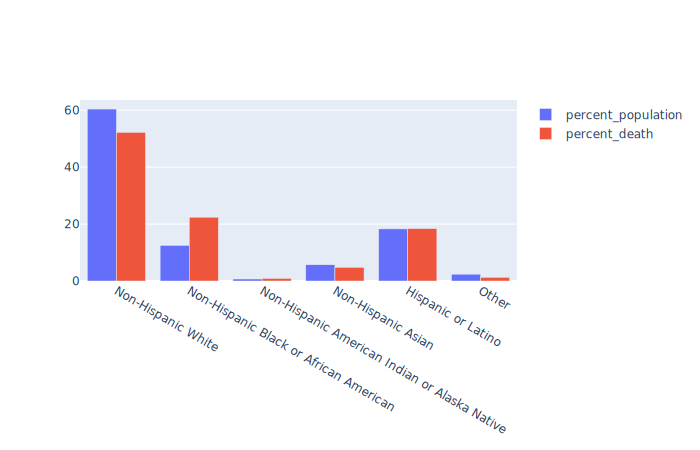

In [78]:
x= ['Non-Hispanic White','Non-Hispanic Black or African American','Non-Hispanic American Indian or Alaska Native','Non-Hispanic Asian','Hispanic or Latino','Other']
                            
y_1=race_percent_death_us.query("Indicator=='Unweighted distribution of population (%)'")['value']
y_2 =race_percent_death_us.query("Indicator=='Distribution of COVID-19 deaths (%)'")['value']

fig = go.Figure(data=[
    go.Bar(name='percent_population', x=x, y=y_1),
    go.Bar(name='percent_death', x=x, y=y_2)
]).update_layout(barmode='group')
fig.show()

In [79]:
race_percent_death_only= race_percent_clean.query("Indicator=='Distribution of COVID-19 deaths (%)'")
race_percent_death_only.head()
race_percent_death_only.shape

,State,Indicator,Non-Hispanic White,Non-Hispanic Black or African American,Non-Hispanic American Indian or Alaska Native,Non-Hispanic Asian,Hispanic or Latino,Other
1,United States,Distribution of COVID-19 deaths (%),52.2,22.4,0.9,4.8,18.4,1.3
5,Alabama,Distribution of COVID-19 deaths (%),52.2,44.1,0.0,0.0,2.8,0.0
9,Arizona,Distribution of COVID-19 deaths (%),45.1,3.5,15.7,1.6,31.8,2.3
13,Arkansas,Distribution of COVID-19 deaths (%),56.2,22.0,0.0,0.0,9.2,10.8
17,California,Distribution of COVID-19 deaths (%),30.3,8.1,0.3,13.5,46.7,1.1


(48, 8)

In [80]:
race_percent_death_only.isna().sum()

State                                            0
Indicator                                        0
Non-Hispanic White                               0
Non-Hispanic Black or African American           0
Non-Hispanic American Indian or Alaska Native    0
Non-Hispanic Asian                               0
Hispanic or Latino                               0
Other                                            0
dtype: int64

In [81]:
#race_percent_death_only=race_percent_death_only.drop(columns=['Data as of','Start Week','End Week','Indicator'] ,inplace =True,  errors='ignore')


In [82]:
highest_am_deaths=race_percent_death_only.nlargest(16,'Non-Hispanic Black or African American')
highest_am_deaths

,State,Indicator,Non-Hispanic White,Non-Hispanic Black or African American,Non-Hispanic American Indian or Alaska Native,Non-Hispanic Asian,Hispanic or Latino,Other
33,District of Columbia,Distribution of COVID-19 deaths (%),11.3,72.5,0.0,1.7,14.1,0.0
69,Louisiana,Distribution of COVID-19 deaths (%),44.3,52.0,0.3,0.7,2.6,0.0
93,Mississippi,Distribution of COVID-19 deaths (%),42.1,50.7,5.4,0.0,1.5,0.0
41,Georgia,Distribution of COVID-19 deaths (%),47.6,44.4,0.0,1.6,6.1,0.0
5,Alabama,Distribution of COVID-19 deaths (%),52.2,44.1,0.0,0.0,2.8,0.0
157,South Carolina,Distribution of COVID-19 deaths (%),52.3,43.4,0.0,0.0,3.4,0.0
85,Michigan,Distribution of COVID-19 deaths (%),53.0,41.6,0.0,1.1,2.5,1.7
77,Maryland,Distribution of COVID-19 deaths (%),42.7,41.4,0.0,4.0,11.3,0.5
165,Tennessee,Distribution of COVID-19 deaths (%),53.0,35.1,0.0,2.0,9.3,0.0
97,Missouri,Distribution of COVID-19 deaths (%),61.2,34.1,0.0,1.5,2.5,0.0


In [83]:
#pip install plotly==4.9.0

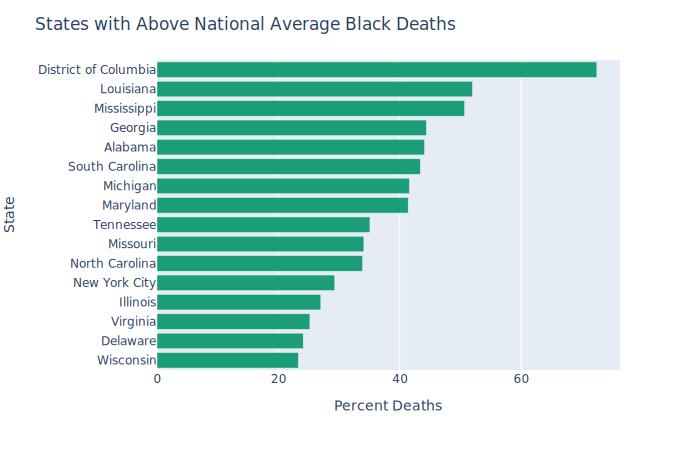

In [84]:
fig = px.bar(highest_am_deaths,
                 x="Non-Hispanic Black or African American",y='State',  
                 text='Non-Hispanic Black or African American', orientation='h', width=700, 
                 color_discrete_sequence = px.colors.qualitative.Dark2).update_layout(title='States with Above National Average Black Deaths', 
                      xaxis_title="Percent Deaths",
                      yaxis_title="State",
                      
                      yaxis_categoryorder = 'total ascending',
                      uniformtext_minsize=8, uniformtext_mode='hide')
fig.show()

In [85]:
high_death_states_list=list(highest_am_deaths.State.unique())
high_death_states_list

['District of Columbia',
 'Louisiana',
 'Mississippi',
 'Georgia',
 'Alabama',
 'South Carolina',
 'Michigan',
 'Maryland',
 'Tennessee',
 'Missouri',
 'North Carolina',
 'New York City',
 'Illinois',
 'Virginia',
 'Delaware',
 'Wisconsin']

In [86]:
highest_am_deaths.head()

,State,Indicator,Non-Hispanic White,Non-Hispanic Black or African American,Non-Hispanic American Indian or Alaska Native,Non-Hispanic Asian,Hispanic or Latino,Other
33,District of Columbia,Distribution of COVID-19 deaths (%),11.3,72.5,0.0,1.7,14.1,0.0
69,Louisiana,Distribution of COVID-19 deaths (%),44.3,52.0,0.3,0.7,2.6,0.0
93,Mississippi,Distribution of COVID-19 deaths (%),42.1,50.7,5.4,0.0,1.5,0.0
41,Georgia,Distribution of COVID-19 deaths (%),47.6,44.4,0.0,1.6,6.1,0.0
5,Alabama,Distribution of COVID-19 deaths (%),52.2,44.1,0.0,0.0,2.8,0.0


# CASES and DEATHS by Race

In [87]:
race_df= pd.read_csv('covid 19 Race Data .csv')
race_df.fillna(value=0, inplace =True)
race_df.head()
race_df.shape

,Date,State,Cases_Total,Cases_White,Cases_Black,Cases_LatinX,Cases_Asian,Cases_AIAN,Cases_NHPI,Cases_Multiracial,Cases_Other,Cases_Unknown,Cases_Ethnicity_Hispanic,Cases_Ethnicity_NonHispanic,Cases_Ethnicity_Unknown,Deaths_Total,Deaths_White,Deaths_Black,Deaths_LatinX,Deaths_Asian,Deaths_AIAN,Deaths_NHPI,Deaths_Multiracial,Deaths_Other,Deaths_Unknown,Deaths_Ethnicity_Hispanic,Deaths_Ethnicity_NonHispanic,Deaths_Ethnicity_Unknown
0,20200722,AK,2132,750,49.0,0.0,67.0,282.0,76.0,61.0,38.0,809.0,117.0,1045.0,970.0,19.0,11.0,0.0,0.0,2.0,4.0,1.0,0.0,0.0,1.0,0.0,18.0,1.0
1,20200722,AL,71813,22694,20884.0,0.0,267.0,0.0,0.0,0.0,3957.0,24002.0,5457.0,36516.0,29832.0,1364.0,672.0,561.0,0.0,4.0,0.0,0.0,0.0,27.0,100.0,45.0,1126.0,193.0
2,20200722,AR,35246,17406,7521.0,0.0,498.0,101.0,1985.0,0.0,4638.0,3097.0,8411.0,26835.0,0.0,380.0,214.0,100.0,0.0,6.0,0.0,30.0,0.0,27.0,3.0,41.0,336.0,3.0
3,20200722,AS,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,20200722,AZ,150609,24130,3246.0,34645.0,1096.0,9085.0,0.0,0.0,3034.0,75373.0,34645.0,40591.0,75373.0,2974.0,1128.0,86.0,786.0,32.0,394.0,0.0,0.0,53.0,495.0,786.0,1693.0,495.0


(1680, 28)

In [88]:
race_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1680 entries, 0 to 1679
Data columns (total 28 columns):
Date                            1680 non-null int64
State                           1680 non-null object
Cases_Total                     1680 non-null object
Cases_White                     1680 non-null object
Cases_Black                     1680 non-null float64
Cases_LatinX                    1680 non-null float64
Cases_Asian                     1680 non-null float64
Cases_AIAN                      1680 non-null float64
Cases_NHPI                      1680 non-null float64
Cases_Multiracial               1680 non-null float64
Cases_Other                     1680 non-null float64
Cases_Unknown                   1680 non-null float64
Cases_Ethnicity_Hispanic        1680 non-null float64
Cases_Ethnicity_NonHispanic     1680 non-null float64
Cases_Ethnicity_Unknown         1680 non-null float64
Deaths_Total                    1680 non-null float64
Deaths_White                    16

#### The data types for columns Cases_White and Cases_Total are object so we have to find the string valuse in those columns

In [89]:
df_comma_w= race_df[race_df['Cases_White'].str.isdigit() == False]
df_comma_w

,Date,State,Cases_Total,Cases_White,Cases_Black,Cases_LatinX,Cases_Asian,Cases_AIAN,Cases_NHPI,Cases_Multiracial,Cases_Other,Cases_Unknown,Cases_Ethnicity_Hispanic,Cases_Ethnicity_NonHispanic,Cases_Ethnicity_Unknown,Deaths_Total,Deaths_White,Deaths_Black,Deaths_LatinX,Deaths_Asian,Deaths_AIAN,Deaths_NHPI,Deaths_Multiracial,Deaths_Other,Deaths_Unknown,Deaths_Ethnicity_Hispanic,Deaths_Ethnicity_NonHispanic,Deaths_Ethnicity_Unknown
1174,20200513,WV,"1,404","1,148",105.0,0.0,0.0,0.0,0.0,0.0,152.0,0.0,0.0,0.0,0.0,59.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,56.0,0.0,0.0,0.0


In [90]:
df_comma_t= race_df[race_df['Cases_Total'].str.isdigit() == False]
df_comma_t

,Date,State,Cases_Total,Cases_White,Cases_Black,Cases_LatinX,Cases_Asian,Cases_AIAN,Cases_NHPI,Cases_Multiracial,Cases_Other,Cases_Unknown,Cases_Ethnicity_Hispanic,Cases_Ethnicity_NonHispanic,Cases_Ethnicity_Unknown,Deaths_Total,Deaths_White,Deaths_Black,Deaths_LatinX,Deaths_Asian,Deaths_AIAN,Deaths_NHPI,Deaths_Multiracial,Deaths_Other,Deaths_Unknown,Deaths_Ethnicity_Hispanic,Deaths_Ethnicity_NonHispanic,Deaths_Ethnicity_Unknown
1174,20200513,WV,"1,404","1,148",105.0,0.0,0.0,0.0,0.0,0.0,152.0,0.0,0.0,0.0,0.0,59.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,56.0,0.0,0.0,0.0


need to remove the commas in those values

In [91]:
race_df['Cases_White']=race_df['Cases_White'].str.replace(',', '').astype(float)
race_df['Cases_Total']=race_df['Cases_Total'].str.replace(',', '').astype(float)

In [92]:
race_df.fillna(0,inplace= True)

In [93]:
race_df.isna().sum()

Date                            0
State                           0
Cases_Total                     0
Cases_White                     0
Cases_Black                     0
Cases_LatinX                    0
Cases_Asian                     0
Cases_AIAN                      0
Cases_NHPI                      0
Cases_Multiracial               0
Cases_Other                     0
Cases_Unknown                   0
Cases_Ethnicity_Hispanic        0
Cases_Ethnicity_NonHispanic     0
Cases_Ethnicity_Unknown         0
Deaths_Total                    0
Deaths_White                    0
Deaths_Black                    0
Deaths_LatinX                   0
Deaths_Asian                    0
Deaths_AIAN                     0
Deaths_NHPI                     0
Deaths_Multiracial              0
Deaths_Other                    0
Deaths_Unknown                  0
Deaths_Ethnicity_Hispanic       0
Deaths_Ethnicity_NonHispanic    0
Deaths_Ethnicity_Unknown        0
dtype: int64

In [94]:
race_df.head()

,Date,State,Cases_Total,Cases_White,Cases_Black,Cases_LatinX,Cases_Asian,Cases_AIAN,Cases_NHPI,Cases_Multiracial,Cases_Other,Cases_Unknown,Cases_Ethnicity_Hispanic,Cases_Ethnicity_NonHispanic,Cases_Ethnicity_Unknown,Deaths_Total,Deaths_White,Deaths_Black,Deaths_LatinX,Deaths_Asian,Deaths_AIAN,Deaths_NHPI,Deaths_Multiracial,Deaths_Other,Deaths_Unknown,Deaths_Ethnicity_Hispanic,Deaths_Ethnicity_NonHispanic,Deaths_Ethnicity_Unknown
0,20200722,AK,2132.0,750.0,49.0,0.0,67.0,282.0,76.0,61.0,38.0,809.0,117.0,1045.0,970.0,19.0,11.0,0.0,0.0,2.0,4.0,1.0,0.0,0.0,1.0,0.0,18.0,1.0
1,20200722,AL,71813.0,22694.0,20884.0,0.0,267.0,0.0,0.0,0.0,3957.0,24002.0,5457.0,36516.0,29832.0,1364.0,672.0,561.0,0.0,4.0,0.0,0.0,0.0,27.0,100.0,45.0,1126.0,193.0
2,20200722,AR,35246.0,17406.0,7521.0,0.0,498.0,101.0,1985.0,0.0,4638.0,3097.0,8411.0,26835.0,0.0,380.0,214.0,100.0,0.0,6.0,0.0,30.0,0.0,27.0,3.0,41.0,336.0,3.0
3,20200722,AS,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,20200722,AZ,150609.0,24130.0,3246.0,34645.0,1096.0,9085.0,0.0,0.0,3034.0,75373.0,34645.0,40591.0,75373.0,2974.0,1128.0,86.0,786.0,32.0,394.0,0.0,0.0,53.0,495.0,786.0,1693.0,495.0


In [95]:
race_df.head()

,Date,State,Cases_Total,Cases_White,Cases_Black,Cases_LatinX,Cases_Asian,Cases_AIAN,Cases_NHPI,Cases_Multiracial,Cases_Other,Cases_Unknown,Cases_Ethnicity_Hispanic,Cases_Ethnicity_NonHispanic,Cases_Ethnicity_Unknown,Deaths_Total,Deaths_White,Deaths_Black,Deaths_LatinX,Deaths_Asian,Deaths_AIAN,Deaths_NHPI,Deaths_Multiracial,Deaths_Other,Deaths_Unknown,Deaths_Ethnicity_Hispanic,Deaths_Ethnicity_NonHispanic,Deaths_Ethnicity_Unknown
0,20200722,AK,2132.0,750.0,49.0,0.0,67.0,282.0,76.0,61.0,38.0,809.0,117.0,1045.0,970.0,19.0,11.0,0.0,0.0,2.0,4.0,1.0,0.0,0.0,1.0,0.0,18.0,1.0
1,20200722,AL,71813.0,22694.0,20884.0,0.0,267.0,0.0,0.0,0.0,3957.0,24002.0,5457.0,36516.0,29832.0,1364.0,672.0,561.0,0.0,4.0,0.0,0.0,0.0,27.0,100.0,45.0,1126.0,193.0
2,20200722,AR,35246.0,17406.0,7521.0,0.0,498.0,101.0,1985.0,0.0,4638.0,3097.0,8411.0,26835.0,0.0,380.0,214.0,100.0,0.0,6.0,0.0,30.0,0.0,27.0,3.0,41.0,336.0,3.0
3,20200722,AS,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,20200722,AZ,150609.0,24130.0,3246.0,34645.0,1096.0,9085.0,0.0,0.0,3034.0,75373.0,34645.0,40591.0,75373.0,2974.0,1128.0,86.0,786.0,32.0,394.0,0.0,0.0,53.0,495.0,786.0,1693.0,495.0


(layout.Updatemenu({
     'buttons': [{'args': [None, {'frame': {'duration': 500, 'redraw': True},
                           'mode': 'immediate', 'fromcurrent': True, 'transition':
                           {'duration': 500, 'easing': 'linear'}}],
                  'label': '&#9654;',
                  'method': 'animate'},
                 {'args': [[None], {'frame': {'duration': 0, 'redraw': True},
                           'mode': 'immediate', 'fromcurrent': True, 'transition':
                           {'duration': 0, 'easing': 'linear'}}],
                  'label': '&#9724;',
                  'method': 'animate'}],
     'direction': 'left',
     'pad': {'r': 10, 't': 70},
     'showactive': False,
     'type': 'buttons',
     'x': 0.1,
     'xanchor': 'right',
     'y': 0,
     'yanchor': 'top'
 }),)

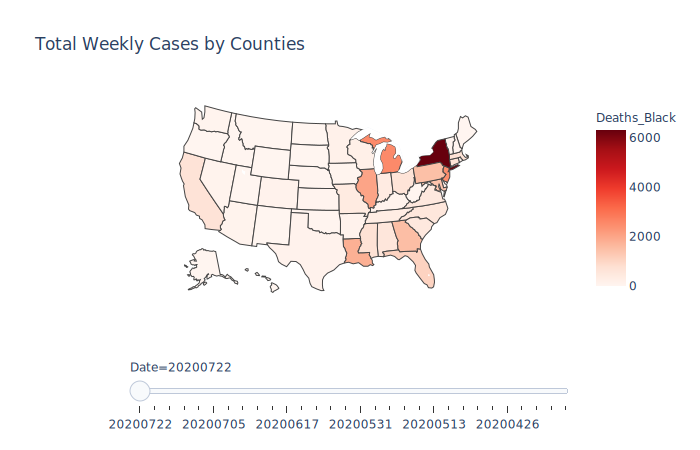

In [96]:
fig = px.choropleth(race_df, 
                    locationmode ='USA-states', 
                    locations='State', 
                    color='Deaths_Black',
                    color_continuous_scale='reds',
                    title = "Total Weekly Cases by Counties",
                    scope="usa",
                    animation_frame='Date',
                          )
fig["layout"].pop("updatemenus")
fig.show()

In [97]:
race_by_state = race_df.groupby(by='State', as_index=False).sum()
race_by_state.shape
race_by_state.tail(10) 

(56, 28)

,State,Date,Cases_Total,Cases_White,Cases_Black,Cases_LatinX,Cases_Asian,Cases_AIAN,Cases_NHPI,Cases_Multiracial,Cases_Other,Cases_Unknown,Cases_Ethnicity_Hispanic,Cases_Ethnicity_NonHispanic,Cases_Ethnicity_Unknown,Deaths_Total,Deaths_White,Deaths_Black,Deaths_LatinX,Deaths_Asian,Deaths_AIAN,Deaths_NHPI,Deaths_Multiracial,Deaths_Other,Deaths_Unknown,Deaths_Ethnicity_Hispanic,Deaths_Ethnicity_NonHispanic,Deaths_Ethnicity_Unknown
46,TN,606017080,905690.0,379914.0,187365.0,0.0,12985.0,641.0,420.0,0.0,126128.0,198237.0,190282.0,459282.0,256056.0,12390.0,7036.0,4234.0,0.0,240.0,0.0,10.0,0.0,627.0,243.0,931.0,11049.0,410.0
47,TX,606017080,3098412.0,130301.0,61511.0,176174.0,13939.0,0.0,0.0,0.0,2734.0,2713753.0,174441.0,208009.0,2712395.0,52853.0,6160.0,2004.0,3958.0,262.0,0.0,0.0,0.0,62.0,39626.0,3928.0,8623.0,40336.0
48,UT,606017080,405160.0,149833.0,11192.0,125075.0,9339.0,10613.0,15148.0,0.0,48392.0,44326.0,164500.0,194173.0,45797.0,3278.0,1216.0,60.0,548.0,111.0,148.0,130.0,0.0,179.0,1093.0,548.0,1637.0,100.0
49,VA,606017080,1270048.0,330537.0,191624.0,243309.0,23833.0,869.0,0.0,2355.0,129675.0,347846.0,392109.0,478980.0,340695.0,36137.0,19729.0,7947.0,2184.0,1158.0,20.0,0.0,2.0,2076.0,3021.0,3460.0,27728.0,3988.0
50,VI,606017080,2485.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2485.0,0.0,0.0,0.0,131.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,131.0,0.0,0.0,0.0
51,VT,606017080,28984.0,24815.0,1926.0,51.0,822.0,41.0,0.0,0.0,459.0,921.0,827.0,26057.0,2102.0,1449.0,1346.0,0.0,0.0,54.0,0.0,0.0,0.0,47.0,2.0,2.0,1432.0,15.0
52,WA,606017080,737119.0,198259.0,30892.0,205091.0,34336.0,7918.0,13346.0,8831.0,11257.0,227189.0,201053.0,294017.0,217765.0,32511.0,21409.0,985.0,3268.0,2774.0,405.0,255.0,397.0,656.0,2362.0,3182.0,25791.0,2212.0
53,WI,606017080,602924.0,334811.0,108750.0,0.0,21659.0,5956.0,0.0,0.0,66348.0,65400.0,176333.0,353664.0,72926.0,16865.0,11407.0,4355.0,0.0,438.0,215.0,0.0,0.0,173.0,277.0,1691.0,14842.0,332.0
54,WV,606017080,65403.0,52046.0,4663.0,0.0,0.0,0.0,0.0,0.0,8776.0,25.0,0.0,0.0,0.0,1842.0,1161.0,62.0,0.0,0.0,0.0,0.0,0.0,0.0,619.0,0.0,0.0,0.0
55,WY,606017080,25298.0,12783.0,276.0,3185.0,155.0,6273.0,57.0,0.0,895.0,3312.0,3263.0,20173.0,3299.0,376.0,123.0,0.0,18.0,0.0,127.0,0.0,0.0,0.0,108.0,18.0,255.0,16.0


In [98]:
race_by_state['Cases_White_percent']= round(race_by_state['Cases_White']/race_by_state['Cases_Total']*100,2)
race_by_state['Cases_Black_percent']= round(race_by_state['Cases_Black']/race_by_state['Cases_Total']*100,2)
race_by_state['Cases_LatinX_percent']= round(race_by_state['Cases_LatinX']/race_by_state['Cases_Total']*100,2)
race_by_state['Cases_Asian_percent']= round(race_by_state['Cases_Asian']/race_by_state['Cases_Total']*100,2)
race_by_state['Cases_AIAN_percent']= round(race_by_state['Cases_AIAN']/race_by_state['Cases_Total']*100,2)
race_by_state['Cases_NHPI_percent']= round(race_by_state['Cases_NHPI']/race_by_state['Cases_Total']*100,2)
race_by_state['Cases_Multiracial_percent']= round(race_by_state['Cases_Multiracial']/race_by_state['Cases_Total']*100,2)
race_by_state['Cases_Other_percent']= round(race_by_state['Cases_Other']/race_by_state['Cases_Total']*100,2)
race_by_state['Cases_Unknown_percent']= round(race_by_state['Cases_Unknown']/race_by_state['Cases_Total']*100,2)
race_by_state.head()

,State,Date,Cases_Total,Cases_White,Cases_Black,Cases_LatinX,Cases_Asian,Cases_AIAN,Cases_NHPI,Cases_Multiracial,Cases_Other,Cases_Unknown,Cases_Ethnicity_Hispanic,Cases_Ethnicity_NonHispanic,Cases_Ethnicity_Unknown,Deaths_Total,Deaths_White,Deaths_Black,Deaths_LatinX,Deaths_Asian,Deaths_AIAN,Deaths_NHPI,Deaths_Multiracial,Deaths_Other,Deaths_Unknown,Deaths_Ethnicity_Hispanic,Deaths_Ethnicity_NonHispanic,Deaths_Ethnicity_Unknown,Cases_White_percent,Cases_Black_percent,Cases_LatinX_percent,Cases_Asian_percent,Cases_AIAN_percent,Cases_NHPI_percent,Cases_Multiracial_percent,Cases_Other_percent,Cases_Unknown_percent
0,AK,606017080,21110.0,10675.0,508.0,0.0,1480.0,2243.0,609.0,661.0,459.0,4475.0,1432.0,14178.0,5703.0,317.0,147.0,0.0,0.0,42.0,50.0,21.0,0.0,0.0,27.0,0.0,255.0,62.0,50.57,2.41,0.00,7.01,10.63,2.88,3.13,2.17,21.20
1,AL,606017080,731345.0,259537.0,262248.0,0.0,3323.0,0.0,0.0,0.0,37643.0,168536.0,63683.0,450709.0,216933.0,19350.0,9492.0,8497.0,0.0,105.0,0.0,0.0,0.0,289.0,946.0,510.0,16484.0,2341.0,35.49,35.86,0.00,0.45,0.00,0.00,0.00,5.15,23.04
2,AR,606017080,361431.0,173073.0,89306.0,232.0,4395.0,981.0,19541.0,154.0,41638.0,32059.0,74794.0,268920.0,9916.0,4921.0,2728.0,1418.0,0.0,43.0,0.0,292.0,0.0,285.0,92.0,326.0,3948.0,300.0,47.89,24.71,0.06,1.22,0.27,5.41,0.04,11.52,8.87
3,AS,606017080,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,AZ,606017080,1336330.0,231713.0,32411.0,309291.0,10693.0,108902.0,128.0,0.0,27289.0,615903.0,308639.0,408866.0,611324.0,32963.0,14009.0,973.0,6861.0,375.0,5419.0,2.0,0.0,592.0,4732.0,6838.0,21228.0,4641.0,17.34,2.43,23.14,0.80,8.15,0.01,0.00,2.04,46.09


In [99]:
race_by_state['Deaths_White_percent']= round(race_by_state['Deaths_White']/race_by_state['Deaths_Total']*100,2)
race_by_state['Deaths_Black_percent']= round(race_by_state['Deaths_Black']/race_by_state['Deaths_Total']*100,2)
race_by_state['DeathsDeaths_LatinX_percent']= round(race_by_state['Deaths_LatinX']/race_by_state['Deaths_Total']*100,2)
race_by_state['Deaths_Asian_percent']= round(race_by_state['Deaths_Asian']/race_by_state['Deaths_Total']*100,2)
race_by_state['Deaths_AIAN_percent']= round(race_by_state['Deaths_AIAN']/race_by_state['Deaths_Total']*100,2)
race_by_state['Deaths_NHPI_percent']= round(race_by_state['Deaths_NHPI']/race_by_state['Deaths_Total']*100,2)
race_by_state['Deaths_Multiracial_percent']= round(race_by_state['Deaths_Multiracial']/race_by_state['Deaths_Total']*100,2)
race_by_state['Deaths_Other_percent']= round(race_by_state['Deaths_Other']/race_by_state['Deaths_Total']*100,2)
race_by_state['Deaths_Unknown_percent']= round(race_by_state['Deaths_Unknown']/race_by_state['Deaths_Total']*100,2)
race_by_state.head()

,State,Date,Cases_Total,Cases_White,Cases_Black,Cases_LatinX,Cases_Asian,Cases_AIAN,Cases_NHPI,Cases_Multiracial,Cases_Other,Cases_Unknown,Cases_Ethnicity_Hispanic,Cases_Ethnicity_NonHispanic,Cases_Ethnicity_Unknown,Deaths_Total,Deaths_White,Deaths_Black,Deaths_LatinX,Deaths_Asian,Deaths_AIAN,Deaths_NHPI,Deaths_Multiracial,Deaths_Other,Deaths_Unknown,Deaths_Ethnicity_Hispanic,Deaths_Ethnicity_NonHispanic,Deaths_Ethnicity_Unknown,Cases_White_percent,Cases_Black_percent,Cases_LatinX_percent,Cases_Asian_percent,Cases_AIAN_percent,Cases_NHPI_percent,Cases_Multiracial_percent,Cases_Other_percent,Cases_Unknown_percent,Deaths_White_percent,Deaths_Black_percent,DeathsDeaths_LatinX_percent,Deaths_Asian_percent,Deaths_AIAN_percent,Deaths_NHPI_percent,Deaths_Multiracial_percent,Deaths_Other_percent,Deaths_Unknown_percent
0,AK,606017080,21110.0,10675.0,508.0,0.0,1480.0,2243.0,609.0,661.0,459.0,4475.0,1432.0,14178.0,5703.0,317.0,147.0,0.0,0.0,42.0,50.0,21.0,0.0,0.0,27.0,0.0,255.0,62.0,50.57,2.41,0.00,7.01,10.63,2.88,3.13,2.17,21.20,46.37,0.00,0.00,13.25,15.77,6.62,0.0,0.00,8.52
1,AL,606017080,731345.0,259537.0,262248.0,0.0,3323.0,0.0,0.0,0.0,37643.0,168536.0,63683.0,450709.0,216933.0,19350.0,9492.0,8497.0,0.0,105.0,0.0,0.0,0.0,289.0,946.0,510.0,16484.0,2341.0,35.49,35.86,0.00,0.45,0.00,0.00,0.00,5.15,23.04,49.05,43.91,0.00,0.54,0.00,0.00,0.0,1.49,4.89
2,AR,606017080,361431.0,173073.0,89306.0,232.0,4395.0,981.0,19541.0,154.0,41638.0,32059.0,74794.0,268920.0,9916.0,4921.0,2728.0,1418.0,0.0,43.0,0.0,292.0,0.0,285.0,92.0,326.0,3948.0,300.0,47.89,24.71,0.06,1.22,0.27,5.41,0.04,11.52,8.87,55.44,28.82,0.00,0.87,0.00,5.93,0.0,5.79,1.87
3,AS,606017080,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,AZ,606017080,1336330.0,231713.0,32411.0,309291.0,10693.0,108902.0,128.0,0.0,27289.0,615903.0,308639.0,408866.0,611324.0,32963.0,14009.0,973.0,6861.0,375.0,5419.0,2.0,0.0,592.0,4732.0,6838.0,21228.0,4641.0,17.34,2.43,23.14,0.80,8.15,0.01,0.00,2.04,46.09,42.50,2.95,20.81,1.14,16.44,0.01,0.0,1.80,14.36


In [100]:
race_by_state.fillna(0, inplace =True)

In [101]:
race_by_state.columns

Index(['State', 'Date', 'Cases_Total', 'Cases_White', 'Cases_Black',
       'Cases_LatinX', 'Cases_Asian', 'Cases_AIAN', 'Cases_NHPI',
       'Cases_Multiracial', 'Cases_Other', 'Cases_Unknown',
       'Cases_Ethnicity_Hispanic', 'Cases_Ethnicity_NonHispanic',
       'Cases_Ethnicity_Unknown', 'Deaths_Total', 'Deaths_White',
       'Deaths_Black', 'Deaths_LatinX', 'Deaths_Asian', 'Deaths_AIAN',
       'Deaths_NHPI', 'Deaths_Multiracial', 'Deaths_Other', 'Deaths_Unknown',
       'Deaths_Ethnicity_Hispanic', 'Deaths_Ethnicity_NonHispanic',
       'Deaths_Ethnicity_Unknown', 'Cases_White_percent',
       'Cases_Black_percent', 'Cases_LatinX_percent', 'Cases_Asian_percent',
       'Cases_AIAN_percent', 'Cases_NHPI_percent', 'Cases_Multiracial_percent',
       'Cases_Other_percent', 'Cases_Unknown_percent', 'Deaths_White_percent',
       'Deaths_Black_percent', 'DeathsDeaths_LatinX_percent',
       'Deaths_Asian_percent', 'Deaths_AIAN_percent', 'Deaths_NHPI_percent',
       'Deaths_Multirac

In [102]:
race_case_death_percent = race_by_state[[ 'State', 'Cases_Total', 'Deaths_Total','Cases_White_percent',
       'Cases_Black_percent', 'Cases_LatinX_percent', 'Cases_Asian_percent',
       'Cases_AIAN_percent', 'Cases_NHPI_percent', 'Cases_Multiracial_percent',
       'Cases_Other_percent', 'Cases_Unknown_percent', 'Deaths_White_percent',
       'Deaths_Black_percent', 'DeathsDeaths_LatinX_percent',
       'Deaths_Asian_percent', 'Deaths_AIAN_percent', 'Deaths_NHPI_percent',
       'Deaths_Multiracial_percent', 'Deaths_Other_percent',
       'Deaths_Unknown_percent']].copy()

## Merge the policies date with race data

The race data set has 56 states but the policies data has 51 state. We need to remove the extra states in the race data set since we don't have the info by race for those states.

In [103]:
different_states= list(set(race_case_death_percent['State'])- set(policies_df['State Abbreviation']))
different_states

['AS', 'GU', 'PR', 'VI', 'MP']

In [104]:
race_case_death_percent_clean= race_case_death_percent[~race_case_death_percent['State'].isin(different_states)]
race_case_death_percent_clean.head()
race_case_death_percent_clean.shape

,State,Cases_Total,Deaths_Total,Cases_White_percent,Cases_Black_percent,Cases_LatinX_percent,Cases_Asian_percent,Cases_AIAN_percent,Cases_NHPI_percent,Cases_Multiracial_percent,Cases_Other_percent,Cases_Unknown_percent,Deaths_White_percent,Deaths_Black_percent,DeathsDeaths_LatinX_percent,Deaths_Asian_percent,Deaths_AIAN_percent,Deaths_NHPI_percent,Deaths_Multiracial_percent,Deaths_Other_percent,Deaths_Unknown_percent
0,AK,21110.0,317.0,50.57,2.41,0.00,7.01,10.63,2.88,3.13,2.17,21.20,46.37,0.00,0.00,13.25,15.77,6.62,0.00,0.00,8.52
1,AL,731345.0,19350.0,35.49,35.86,0.00,0.45,0.00,0.00,0.00,5.15,23.04,49.05,43.91,0.00,0.54,0.00,0.00,0.00,1.49,4.89
2,AR,361431.0,4921.0,47.89,24.71,0.06,1.22,0.27,5.41,0.04,11.52,8.87,55.44,28.82,0.00,0.87,0.00,5.93,0.00,5.79,1.87
4,AZ,1336330.0,32963.0,17.34,2.43,23.14,0.80,8.15,0.01,0.00,2.04,46.09,42.50,2.95,20.81,1.14,16.44,0.01,0.00,1.80,14.36
5,CA,4427497.0,125500.0,12.71,3.20,36.42,5.05,0.14,0.46,0.51,8.41,33.07,31.62,9.21,38.89,14.04,0.33,0.56,0.56,1.09,3.69


(51, 21)

In [105]:
race_case_death_percent_clean.style.highlight_max()

,State,Cases_Total,Deaths_Total,Cases_White_percent,Cases_Black_percent,Cases_LatinX_percent,Cases_Asian_percent,Cases_AIAN_percent,Cases_NHPI_percent,Cases_Multiracial_percent,Cases_Other_percent,Cases_Unknown_percent,Deaths_White_percent,Deaths_Black_percent,DeathsDeaths_LatinX_percent,Deaths_Asian_percent,Deaths_AIAN_percent,Deaths_NHPI_percent,Deaths_Multiracial_percent,Deaths_Other_percent,Deaths_Unknown_percent
0,AK,21110,317,50.57,2.41,0,7.01,10.63,2.88,3.13,2.17,21.2,46.37,0,0,13.25,15.77,6.62,0,0,8.52
1,AL,731345,19350,35.49,35.86,0,0.45,0,0,0,5.15,23.04,49.05,43.91,0,0.54,0,0,0,1.49,4.89
2,AR,361431,4921,47.89,24.71,0.06,1.22,0.27,5.41,0.04,11.52,8.87,55.44,28.82,0,0.87,0,5.93,0,5.79,1.87
4,AZ,1.33633e+06,32963,17.34,2.43,23.14,0.8,8.15,0.01,0,2.04,46.09,42.5,2.95,20.81,1.14,16.44,0.01,0,1.8,14.36
5,CA,4.4275e+06,125500,12.71,3.2,36.42,5.05,0.14,0.46,0.51,8.41,33.07,31.62,9.21,38.89,14.04,0.33,0.56,0.56,1.09,3.69
6,CO,747284,37233,35.69,5.67,33.72,2.49,0.51,0.4,0.9,0.84,17.56,63.6,6.7,18.97,3.5,0.49,0.38,0.96,0.44,3.58
7,CT,1.13497e+06,101156,33.83,12.66,17.81,1.44,0.03,0,0.08,0.57,33.64,72.98,14.9,8.66,1.04,0.01,0,0.2,0.46,1.76
8,DC,235388,12158,18.24,48.29,0,1.46,0.26,0.26,1.62,22.26,7.49,10.77,75.07,11.77,1.54,0,0,0,0.7,0.15
9,DE,248580,9935,29.7,26.57,27.03,1.36,0,0,0.29,4.73,10.35,61.41,25.48,6.21,0.25,0,0,0.09,1.5,5.25
10,FL,3.07342e+06,70935,23.77,15.69,27.58,0,0,0,0,3.9,29.06,48.1,20.36,24.01,0,0,0,0,3.29,4.24


In [106]:
policies_race = pd.merge(policies_df, race_case_death_percent_clean,left_on='State Abbreviation',
    right_on='State',how='left')
policies_race.shape
policies_race.head()

(51, 116)

,State_x,State Abbreviation,State FIPS Code,Paid sick leave,Medicaid Expansion,Population density per square miles,Population 2018,Square Miles,Number Homeless (2019),Percent Unemployed (2018),Percent living under the federal poverty line (2018),Percent at risk for serious illness due to COVID,All-cause deaths 2018,Date closed K-12 schools,Closed day cares,Date banned visitors to nursing homes,Closed non-essential businesses,Closed restaurants except take out,Closed gyms,Closed movie theaters,Closed Bars,State of emergency,Stay at home/ shelter in place,Religious Gatherings Exempt Without Clear Social Distance Mandate*,End/relax stay at home/shelter in place,Began to reopen businesses statewide,Reopen restaurants,Initially reopen restaurants for outdoor dining only,Reopened gyms,Reopened movie theaters,Reopened hair salons/barber shops,Reopen non-essential construction,Reopen Religious gatherings,Reopen non-essential retail,Reopen bars,Reopen Childcare,Resumed elective medical procedures,Begin to Re-Close Bars,Re-Close Bars (statewide),Re-Close Movie Theaters (statewide),Re-Close Gyms (statewide),Re-Close Indoor Dining (Statewide),Mandate face mask use by all individuals in public spaces,Face mask mandate enforced by fines,Face mask mandate enforced by criminal charge/citation,No legal enforcement of face mask mandate,Mandate face mask use by employees in public-facing businesses,Mandate quarantine for those entering the state from specific states,Mandate quarantine for all individuals entering the state from another state,Alcohol/Liquor Stores Open,Allow restaurants to sell takeout alcohol,Allow restaurants to deliver alcohol,Keep Firearms Sellers Open,Stop Initiation of Evictions overall or due to COVID related issues,Stop enforcement of evictions overall or due to COVID related issues,Renter grace period or use of security deposit to pay rent,Order freezing utility shut offs,Froze mortgage payments,Lift Eviction Moratorium,"Prior to pandemic, no state unemployment waiting period; or date waiting period waived not found",Waived one week waiting period for unemployment insurance,Waive work search requirement for unemployment insurance,Expand eligibility of unemployment insurance to anyonewho is quarantined and/or taking care of someone who is quarantined,Expand eligibility to high-risk individuals in preventative quarantine,Expand eligibility of unemployment insurance to those who have lost childcare/school closures,Extend the amount of time an individual can be on unemployment insurance,Weekly unemployment insurance maximum amount (dollars),"Weekly unemployment insurance maximum amount with extra stimulus (through July 21, 2020) (dollars)",Unemployment insurance maximum duration (weeks),Unemployment insurance maximum duration with Pandemic Emergency Unemployment Compensation CARES extension (weeks),SNAP Waiver-Emergency Allotments to Current SNAP Households,SNAP Waiver-Pandemic EBT,SNAP Waiver-Temporary Suspension of Claims Collection,2020 Q1 SNAP ABAWD Time Limit Waiver,Modify Medicaid requirements with 1135 waivers (date of CMS approval),Reopened ACA enrollment using a special enrollment period,State previously allowed audio-only telehealth,Allow audio-only telehealth,Allow/expand Medicaid telehealth coverage,State had CHIP premium non-payment lock-out period as of January 2019,Supend CHIP premium non-payment lock-outs,Suspended elective medical/dental procedures,Made Effort to Limit Abortion Access,Stopped personal visitation in state prisons,Stopped in-person attorney visits in state prisons,Does not charge copays for incarcerated individuals,Waived COVID/respiratory illness-related copays during pandemic for incarcerated individuals,Waived all copays during pandemic for incarcerated individuals,Did not waive copays for incarcerated individuals,Use of telemedicine/telephone evaluations to initiate buprenorphine prescribing,Patients can receive 14-28 take-home doses of opioid medication,Home delivery of take-home medicati

## Check relationships between deaths 

In [107]:
policies_race.head()

,State_x,State Abbreviation,State FIPS Code,Paid sick leave,Medicaid Expansion,Population density per square miles,Population 2018,Square Miles,Number Homeless (2019),Percent Unemployed (2018),Percent living under the federal poverty line (2018),Percent at risk for serious illness due to COVID,All-cause deaths 2018,Date closed K-12 schools,Closed day cares,Date banned visitors to nursing homes,Closed non-essential businesses,Closed restaurants except take out,Closed gyms,Closed movie theaters,Closed Bars,State of emergency,Stay at home/ shelter in place,Religious Gatherings Exempt Without Clear Social Distance Mandate*,End/relax stay at home/shelter in place,Began to reopen businesses statewide,Reopen restaurants,Initially reopen restaurants for outdoor dining only,Reopened gyms,Reopened movie theaters,Reopened hair salons/barber shops,Reopen non-essential construction,Reopen Religious gatherings,Reopen non-essential retail,Reopen bars,Reopen Childcare,Resumed elective medical procedures,Begin to Re-Close Bars,Re-Close Bars (statewide),Re-Close Movie Theaters (statewide),Re-Close Gyms (statewide),Re-Close Indoor Dining (Statewide),Mandate face mask use by all individuals in public spaces,Face mask mandate enforced by fines,Face mask mandate enforced by criminal charge/citation,No legal enforcement of face mask mandate,Mandate face mask use by employees in public-facing businesses,Mandate quarantine for those entering the state from specific states,Mandate quarantine for all individuals entering the state from another state,Alcohol/Liquor Stores Open,Allow restaurants to sell takeout alcohol,Allow restaurants to deliver alcohol,Keep Firearms Sellers Open,Stop Initiation of Evictions overall or due to COVID related issues,Stop enforcement of evictions overall or due to COVID related issues,Renter grace period or use of security deposit to pay rent,Order freezing utility shut offs,Froze mortgage payments,Lift Eviction Moratorium,"Prior to pandemic, no state unemployment waiting period; or date waiting period waived not found",Waived one week waiting period for unemployment insurance,Waive work search requirement for unemployment insurance,Expand eligibility of unemployment insurance to anyonewho is quarantined and/or taking care of someone who is quarantined,Expand eligibility to high-risk individuals in preventative quarantine,Expand eligibility of unemployment insurance to those who have lost childcare/school closures,Extend the amount of time an individual can be on unemployment insurance,Weekly unemployment insurance maximum amount (dollars),"Weekly unemployment insurance maximum amount with extra stimulus (through July 21, 2020) (dollars)",Unemployment insurance maximum duration (weeks),Unemployment insurance maximum duration with Pandemic Emergency Unemployment Compensation CARES extension (weeks),SNAP Waiver-Emergency Allotments to Current SNAP Households,SNAP Waiver-Pandemic EBT,SNAP Waiver-Temporary Suspension of Claims Collection,2020 Q1 SNAP ABAWD Time Limit Waiver,Modify Medicaid requirements with 1135 waivers (date of CMS approval),Reopened ACA enrollment using a special enrollment period,State previously allowed audio-only telehealth,Allow audio-only telehealth,Allow/expand Medicaid telehealth coverage,State had CHIP premium non-payment lock-out period as of January 2019,Supend CHIP premium non-payment lock-outs,Suspended elective medical/dental procedures,Made Effort to Limit Abortion Access,Stopped personal visitation in state prisons,Stopped in-person attorney visits in state prisons,Does not charge copays for incarcerated individuals,Waived COVID/respiratory illness-related copays during pandemic for incarcerated individuals,Waived all copays during pandemic for incarcerated individuals,Did not waive copays for incarcerated individuals,Use of telemedicine/telephone evaluations to initiate buprenorphine prescribing,Patients can receive 14-28 take-home doses of opioid medication,Home delivery of take-home medicati

In [108]:
policies_race['Cases_Total_percent'] = round(policies_race['Cases_Total']/policies_race['Population 2018']*100,2)
policies_race['Deaths_Total_percent']= round(policies_race['Deaths_Total']/policies_race['Population 2018']*100,2)
policies_race['homeles_percent']= round(policies_race['Number Homeless (2019)']/policies_race['Population 2018']*100,2)
policies_race['All-cause deaths 2018_percent']= round(policies_race['All-cause deaths 2018']/policies_race['Population 2018']*100,2)
policies_race.head()

,State_x,State Abbreviation,State FIPS Code,Paid sick leave,Medicaid Expansion,Population density per square miles,Population 2018,Square Miles,Number Homeless (2019),Percent Unemployed (2018),Percent living under the federal poverty line (2018),Percent at risk for serious illness due to COVID,All-cause deaths 2018,Date closed K-12 schools,Closed day cares,Date banned visitors to nursing homes,Closed non-essential businesses,Closed restaurants except take out,Closed gyms,Closed movie theaters,Closed Bars,State of emergency,Stay at home/ shelter in place,Religious Gatherings Exempt Without Clear Social Distance Mandate*,End/relax stay at home/shelter in place,Began to reopen businesses statewide,Reopen restaurants,Initially reopen restaurants for outdoor dining only,Reopened gyms,Reopened movie theaters,Reopened hair salons/barber shops,Reopen non-essential construction,Reopen Religious gatherings,Reopen non-essential retail,Reopen bars,Reopen Childcare,Resumed elective medical procedures,Begin to Re-Close Bars,Re-Close Bars (statewide),Re-Close Movie Theaters (statewide),Re-Close Gyms (statewide),Re-Close Indoor Dining (Statewide),Mandate face mask use by all individuals in public spaces,Face mask mandate enforced by fines,Face mask mandate enforced by criminal charge/citation,No legal enforcement of face mask mandate,Mandate face mask use by employees in public-facing businesses,Mandate quarantine for those entering the state from specific states,Mandate quarantine for all individuals entering the state from another state,Alcohol/Liquor Stores Open,Allow restaurants to sell takeout alcohol,Allow restaurants to deliver alcohol,Keep Firearms Sellers Open,Stop Initiation of Evictions overall or due to COVID related issues,Stop enforcement of evictions overall or due to COVID related issues,Renter grace period or use of security deposit to pay rent,Order freezing utility shut offs,Froze mortgage payments,Lift Eviction Moratorium,"Prior to pandemic, no state unemployment waiting period; or date waiting period waived not found",Waived one week waiting period for unemployment insurance,Waive work search requirement for unemployment insurance,Expand eligibility of unemployment insurance to anyonewho is quarantined and/or taking care of someone who is quarantined,Expand eligibility to high-risk individuals in preventative quarantine,Expand eligibility of unemployment insurance to those who have lost childcare/school closures,Extend the amount of time an individual can be on unemployment insurance,Weekly unemployment insurance maximum amount (dollars),"Weekly unemployment insurance maximum amount with extra stimulus (through July 21, 2020) (dollars)",Unemployment insurance maximum duration (weeks),Unemployment insurance maximum duration with Pandemic Emergency Unemployment Compensation CARES extension (weeks),SNAP Waiver-Emergency Allotments to Current SNAP Households,SNAP Waiver-Pandemic EBT,SNAP Waiver-Temporary Suspension of Claims Collection,2020 Q1 SNAP ABAWD Time Limit Waiver,Modify Medicaid requirements with 1135 waivers (date of CMS approval),Reopened ACA enrollment using a special enrollment period,State previously allowed audio-only telehealth,Allow audio-only telehealth,Allow/expand Medicaid telehealth coverage,State had CHIP premium non-payment lock-out period as of January 2019,Supend CHIP premium non-payment lock-outs,Suspended elective medical/dental procedures,Made Effort to Limit Abortion Access,Stopped personal visitation in state prisons,Stopped in-person attorney visits in state prisons,Does not charge copays for incarcerated individuals,Waived COVID/respiratory illness-related copays during pandemic for incarcerated individuals,Waived all copays during pandemic for incarcerated individuals,Did not waive copays for incarcerated individuals,Use of telemedicine/telephone evaluations to initiate buprenorphine prescribing,Patients can receive 14-28 take-home doses of opioid medication,Home delivery of take-home medicati

In [109]:
policies_race.head()

,State_x,State Abbreviation,State FIPS Code,Paid sick leave,Medicaid Expansion,Population density per square miles,Population 2018,Square Miles,Number Homeless (2019),Percent Unemployed (2018),Percent living under the federal poverty line (2018),Percent at risk for serious illness due to COVID,All-cause deaths 2018,Date closed K-12 schools,Closed day cares,Date banned visitors to nursing homes,Closed non-essential businesses,Closed restaurants except take out,Closed gyms,Closed movie theaters,Closed Bars,State of emergency,Stay at home/ shelter in place,Religious Gatherings Exempt Without Clear Social Distance Mandate*,End/relax stay at home/shelter in place,Began to reopen businesses statewide,Reopen restaurants,Initially reopen restaurants for outdoor dining only,Reopened gyms,Reopened movie theaters,Reopened hair salons/barber shops,Reopen non-essential construction,Reopen Religious gatherings,Reopen non-essential retail,Reopen bars,Reopen Childcare,Resumed elective medical procedures,Begin to Re-Close Bars,Re-Close Bars (statewide),Re-Close Movie Theaters (statewide),Re-Close Gyms (statewide),Re-Close Indoor Dining (Statewide),Mandate face mask use by all individuals in public spaces,Face mask mandate enforced by fines,Face mask mandate enforced by criminal charge/citation,No legal enforcement of face mask mandate,Mandate face mask use by employees in public-facing businesses,Mandate quarantine for those entering the state from specific states,Mandate quarantine for all individuals entering the state from another state,Alcohol/Liquor Stores Open,Allow restaurants to sell takeout alcohol,Allow restaurants to deliver alcohol,Keep Firearms Sellers Open,Stop Initiation of Evictions overall or due to COVID related issues,Stop enforcement of evictions overall or due to COVID related issues,Renter grace period or use of security deposit to pay rent,Order freezing utility shut offs,Froze mortgage payments,Lift Eviction Moratorium,"Prior to pandemic, no state unemployment waiting period; or date waiting period waived not found",Waived one week waiting period for unemployment insurance,Waive work search requirement for unemployment insurance,Expand eligibility of unemployment insurance to anyonewho is quarantined and/or taking care of someone who is quarantined,Expand eligibility to high-risk individuals in preventative quarantine,Expand eligibility of unemployment insurance to those who have lost childcare/school closures,Extend the amount of time an individual can be on unemployment insurance,Weekly unemployment insurance maximum amount (dollars),"Weekly unemployment insurance maximum amount with extra stimulus (through July 21, 2020) (dollars)",Unemployment insurance maximum duration (weeks),Unemployment insurance maximum duration with Pandemic Emergency Unemployment Compensation CARES extension (weeks),SNAP Waiver-Emergency Allotments to Current SNAP Households,SNAP Waiver-Pandemic EBT,SNAP Waiver-Temporary Suspension of Claims Collection,2020 Q1 SNAP ABAWD Time Limit Waiver,Modify Medicaid requirements with 1135 waivers (date of CMS approval),Reopened ACA enrollment using a special enrollment period,State previously allowed audio-only telehealth,Allow audio-only telehealth,Allow/expand Medicaid telehealth coverage,State had CHIP premium non-payment lock-out period as of January 2019,Supend CHIP premium non-payment lock-outs,Suspended elective medical/dental procedures,Made Effort to Limit Abortion Access,Stopped personal visitation in state prisons,Stopped in-person attorney visits in state prisons,Does not charge copays for incarcerated individuals,Waived COVID/respiratory illness-related copays during pandemic for incarcerated individuals,Waived all copays during pandemic for incarcerated individuals,Did not waive copays for incarcerated individuals,Use of telemedicine/telephone evaluations to initiate buprenorphine prescribing,Patients can receive 14-28 take-home doses of opioid medication,Home delivery of take-home medicati

In [110]:
import seaborn as sns

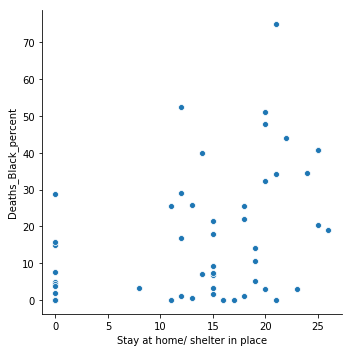

In [111]:
sns.relplot(x ='Stay at home/ shelter in place',y='Deaths_Black_percent', data=policies_race)

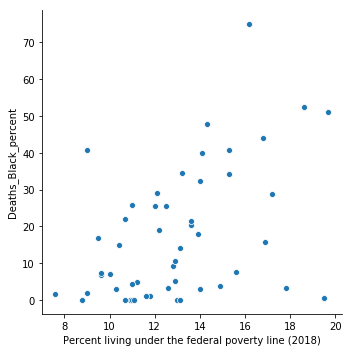

In [112]:

sns.relplot(x ='Percent living under the federal poverty line (2018)',y='Deaths_Black_percent', data=policies_race)

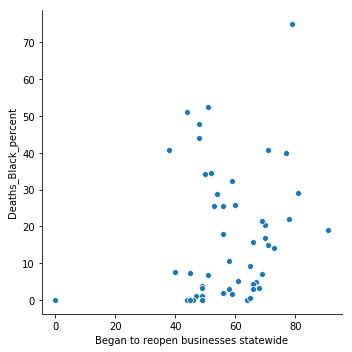

In [113]:

sns.relplot(x ='Began to reopen businesses statewide',y='Deaths_Black_percent', data=policies_race)

In [114]:
# Non numeric column Lists to drop before scaling 
drop_list =['State_x','State Abbreviation','Population 2018','Square Miles','State of emergency','State FIPS Code','Number Homeless (2019)','State_y','Cases_Total','Deaths_Total']
policies_race_clean = policies_race.drop(drop_list, axis=1 )
policies_race_clean.head()

,Paid sick leave,Medicaid Expansion,Population density per square miles,Percent Unemployed (2018),Percent living under the federal poverty line (2018),Percent at risk for serious illness due to COVID,All-cause deaths 2018,Date closed K-12 schools,Closed day cares,Date banned visitors to nursing homes,Closed non-essential businesses,Closed restaurants except take out,Closed gyms,Closed movie theaters,Closed Bars,Stay at home/ shelter in place,Religious Gatherings Exempt Without Clear Social Distance Mandate*,End/relax stay at home/shelter in place,Began to reopen businesses statewide,Reopen restaurants,Initially reopen restaurants for outdoor dining only,Reopened gyms,Reopened movie theaters,Reopened hair salons/barber shops,Reopen non-essential construction,Reopen Religious gatherings,Reopen non-essential retail,Reopen bars,Reopen Childcare,Resumed elective medical procedures,Begin to Re-Close Bars,Re-Close Bars (statewide),Re-Close Movie Theaters (statewide),Re-Close Gyms (statewide),Re-Close Indoor Dining (Statewide),Mandate face mask use by all individuals in public spaces,Face mask mandate enforced by fines,Face mask mandate enforced by criminal charge/citation,No legal enforcement of face mask mandate,Mandate face mask use by employees in public-facing businesses,Mandate quarantine for those entering the state from specific states,Mandate quarantine for all individuals entering the state from another state,Alcohol/Liquor Stores Open,Allow restaurants to sell takeout alcohol,Allow restaurants to deliver alcohol,Keep Firearms Sellers Open,Stop Initiation of Evictions overall or due to COVID related issues,Stop enforcement of evictions overall or due to COVID related issues,Renter grace period or use of security deposit to pay rent,Order freezing utility shut offs,Froze mortgage payments,Lift Eviction Moratorium,"Prior to pandemic, no state unemployment waiting period; or date waiting period waived not found",Waived one week waiting period for unemployment insurance,Waive work search requirement for unemployment insurance,Expand eligibility of unemployment insurance to anyonewho is quarantined and/or taking care of someone who is quarantined,Expand eligibility to high-risk individuals in preventative quarantine,Expand eligibility of unemployment insurance to those who have lost childcare/school closures,Extend the amount of time an individual can be on unemployment insurance,Weekly unemployment insurance maximum amount (dollars),"Weekly unemployment insurance maximum amount with extra stimulus (through July 21, 2020) (dollars)",Unemployment insurance maximum duration (weeks),Unemployment insurance maximum duration with Pandemic Emergency Unemployment Compensation CARES extension (weeks),SNAP Waiver-Emergency Allotments to Current SNAP Households,SNAP Waiver-Pandemic EBT,SNAP Waiver-Temporary Suspension of Claims Collection,2020 Q1 SNAP ABAWD Time Limit Waiver,Modify Medicaid requirements with 1135 waivers (date of CMS approval),Reopened ACA enrollment using a special enrollment period,State previously allowed audio-only telehealth,Allow audio-only telehealth,Allow/expand Medicaid telehealth coverage,State had CHIP premium non-payment lock-out period as of January 2019,Supend CHIP premium non-payment lock-outs,Suspended elective medical/dental procedures,Made Effort to Limit Abortion Access,Stopped personal visitation in state prisons,Stopped in-person attorney visits in state prisons,Does not charge copays for incarcerated individuals,Waived COVID/respiratory illness-related copays during pandemic for incarcerated individuals,Waived all copays during pandemic for incarcerated individuals,Did not waive copays for incarcerated individuals,Use of telemedicine/telephone evaluations to initiate buprenorphine prescribing,Patients can receive 14-28 take-home doses of opioid medication,Home delivery of take-home medication by opioid treatment programs,Use of telemedicine for schedule II-V prescriptions,Exceptions to emergency oral p

In [115]:
for col in policies_race.columns:
    if policies_race[col].dtype== 'object':
        print(col)

State_x
State Abbreviation
No legal enforcement of face mask mandate
State_y


In [116]:
policies_race.head()

,State_x,State Abbreviation,State FIPS Code,Paid sick leave,Medicaid Expansion,Population density per square miles,Population 2018,Square Miles,Number Homeless (2019),Percent Unemployed (2018),Percent living under the federal poverty line (2018),Percent at risk for serious illness due to COVID,All-cause deaths 2018,Date closed K-12 schools,Closed day cares,Date banned visitors to nursing homes,Closed non-essential businesses,Closed restaurants except take out,Closed gyms,Closed movie theaters,Closed Bars,State of emergency,Stay at home/ shelter in place,Religious Gatherings Exempt Without Clear Social Distance Mandate*,End/relax stay at home/shelter in place,Began to reopen businesses statewide,Reopen restaurants,Initially reopen restaurants for outdoor dining only,Reopened gyms,Reopened movie theaters,Reopened hair salons/barber shops,Reopen non-essential construction,Reopen Religious gatherings,Reopen non-essential retail,Reopen bars,Reopen Childcare,Resumed elective medical procedures,Begin to Re-Close Bars,Re-Close Bars (statewide),Re-Close Movie Theaters (statewide),Re-Close Gyms (statewide),Re-Close Indoor Dining (Statewide),Mandate face mask use by all individuals in public spaces,Face mask mandate enforced by fines,Face mask mandate enforced by criminal charge/citation,No legal enforcement of face mask mandate,Mandate face mask use by employees in public-facing businesses,Mandate quarantine for those entering the state from specific states,Mandate quarantine for all individuals entering the state from another state,Alcohol/Liquor Stores Open,Allow restaurants to sell takeout alcohol,Allow restaurants to deliver alcohol,Keep Firearms Sellers Open,Stop Initiation of Evictions overall or due to COVID related issues,Stop enforcement of evictions overall or due to COVID related issues,Renter grace period or use of security deposit to pay rent,Order freezing utility shut offs,Froze mortgage payments,Lift Eviction Moratorium,"Prior to pandemic, no state unemployment waiting period; or date waiting period waived not found",Waived one week waiting period for unemployment insurance,Waive work search requirement for unemployment insurance,Expand eligibility of unemployment insurance to anyonewho is quarantined and/or taking care of someone who is quarantined,Expand eligibility to high-risk individuals in preventative quarantine,Expand eligibility of unemployment insurance to those who have lost childcare/school closures,Extend the amount of time an individual can be on unemployment insurance,Weekly unemployment insurance maximum amount (dollars),"Weekly unemployment insurance maximum amount with extra stimulus (through July 21, 2020) (dollars)",Unemployment insurance maximum duration (weeks),Unemployment insurance maximum duration with Pandemic Emergency Unemployment Compensation CARES extension (weeks),SNAP Waiver-Emergency Allotments to Current SNAP Households,SNAP Waiver-Pandemic EBT,SNAP Waiver-Temporary Suspension of Claims Collection,2020 Q1 SNAP ABAWD Time Limit Waiver,Modify Medicaid requirements with 1135 waivers (date of CMS approval),Reopened ACA enrollment using a special enrollment period,State previously allowed audio-only telehealth,Allow audio-only telehealth,Allow/expand Medicaid telehealth coverage,State had CHIP premium non-payment lock-out period as of January 2019,Supend CHIP premium non-payment lock-outs,Suspended elective medical/dental procedures,Made Effort to Limit Abortion Access,Stopped personal visitation in state prisons,Stopped in-person attorney visits in state prisons,Does not charge copays for incarcerated individuals,Waived COVID/respiratory illness-related copays during pandemic for incarcerated individuals,Waived all copays during pandemic for incarcerated individuals,Did not waive copays for incarcerated individuals,Use of telemedicine/telephone evaluations to initiate buprenorphine prescribing,Patients can receive 14-28 take-home doses of opioid medication,Home delivery of take-home medicati

In [117]:
census_data = pd.read_csv('df_census_ONLY_exportdata-STATE-LEVEL.csv')
census_data.tail()
census_data.shape

,Unnamed: 0,FIPS_CODE,EmployerInsuranceonly-Pop<19,EmployerInsuranceonly-Pop19-34,EmployerInsuranceonly-Pop35-64,EmployerInsuranceonly-Pop65+,DirectPurchaseonly-Pop<19,DirectPurchaseonly-Pop19-34,DirectPurchaseonly-Pop35-64,DirectPurchaseonly-Pop65+,Medicareonly-Pop<19,Medicareonly-Pop19-34,Medicareonly-Pop35-64,Medicareonly-Pop65+,Medicaidonly-Pop<19,Medicaidonly-Pop19-34,Medicaidonly-Pop35-64,Medicaidonly-Pop65+,TRICARE/Militaryonly:-Pop<19,TRICARE/Militaryonly:-Pop19-34,TRICARE/Militaryonly:-Pop35-64,TRICARE/Militaryonly:-Pop65+,VAHealthCareonly-Pop<19,VAHealthCareonly-Pop19-34,VAHealthCareonly-Pop35-64,VAHealthCareonly-Pop65+,2ormoreInsurance-Pop<19,2ormoreInsurance-Pop19-34,2ormoreInsurance-Pop35-64,2ormoreInsurance-Pop65+,PopulationwithnoHealthInsuranceAges-0-18,PopulationwithnoHealthInsuranceAges-19-34,PopulationwithnoHealthInsuranceAges-35-64,PopulationwithnoHealthInsuranceAges-Age65+,CiviliannoninstitutionalizedpopulationwithHealthCoverage,TotalCivilianNoninstitutionalizedPopulation-Withhealthinsurancecoverage,TotalCivilianNoninstitutionalizedPopulation-Withprivatehealthinsurance,TotalCivilianNoninstitutionalizedPopulation-Withpubliccoverage,TotalCivilianNoninstitutionalizedPopulation-Nohealthinsurancecoverage,Civiliannoninstitutionalizedpopulationunder19years,TotalCivilianNoninstitutionalizedPopulationunder19yrs-Nohealthinsurancecoverage,PercentofPopulationwithNoHealthInsuranceCoverage,Totalhouseholds,TotalHouseholdswithacomputer,TotalHouseholdswithabroadbandInternetsubscription,PercentofHouseholdswithInternetAtHome,EnglishOnly-Pop5-17,EnglishOnly-Pop18-64,EnglishOnly-Pop65+,"LanguageSpokenatHomebyAge-Spanish-SpeakEnglish""lessthanverywell""5andover","LanguageSpokenatHomebyAge-Spanish-Speak""lessthanverywell""5andover*marginoferrorEnglish","LanguageSpokenatHomebyAge-OtherIndo-European-SpeakEnglish""lessthanverywell""5andover","LanguageSpokenatHomebyAge-AsianPacificIslands-SpeakEnglish""lessthanverywell""5andover","LanguageSpokenatHomebyAge-OtherLanguages-SpeakEnglish""lessthanverywell""5andover",LanguageSpokenatHome-Spanish(LimitedEnglishHHs/allLimitedEnglishHHs),LanguageSpokenatHome-OtherIndo-European(LimitedEnglishHHs/allLimitedEnglishHHs),LanguageSpokenatHome-AsianandPacificIsland(LimitedEnglishHHs/allLimitedEnglishHHs),LanguageSpokenatHome-Other(LimitedEnglishHHs/allLimitedEnglishHHs),EnglishOnly-Total,Spanish-Pop5-17,Spanish-Pop18-64,Spanish-Pop65+,Spanish-Total,Spanish-SpeakEnglishverywell-Pop5-17,Spanish-SpeakEnglishverywell-Pop18-64,Spanish-SpeakEnglishverywell-Pop65+,Spanish-SpeakEnglishverywell-Total,Spanish-Englishlessthanverywell-Pop5-17,Spanish-Englishlessthanverywell-Pop18-64,Spanish-Englishlessthanverywell-Pop65+,Spanish-Englishlessthanverywell-Total,OtherIndo-European-Pop5-17,OtherIndo-European-Pop18-64,OtherIndo-European-Pop65+,OtherIndo-European-Total,OtherIndo-European-SpeakEnglishverywell-Pop5-17,OtherIndo-European-SpeakEnglishverywell-Pop18-64,OtherIndo-European-SpeakEnglishverywell-Pop65+,OtherIndo-European-SpeakEnglishverywell-Total,OtherIndo-European-Englishlessthanverywell-Pop5-17,OtherIndo-European-Englishlessthanverywell-Pop18-64,OtherIndo-European-Englishlessthanverywell-Pop65+,OtherIndo-European-Englishlessthanverywell-Total,Asian-PacificIsland-Pop5-17,Asian-PacificIsland-Pop18-64,Asian-PacificIsland-Pop65+,Asian-PacificIsland-Total,Asian-PacificIsland-SpeakEnglishverywell-Pop5-17,Asian-PacificIsland-SpeakEnglishverywell-Pop18-64,Asian-PacificIsland-SpeakEnglishverywell-Pop65+,Asian-PacificIsland-SpeakEnglishverywell-Total,Asian-PacificIsland-Englishlessthanverywell-Pop5-17,Asian-PacificIsland-Englishlessthanverywell-Pop18-64,Asian-PacificIsland-Englishlessthanverywell-Pop65+,Asian-PacificIsland-Englishlessthanverywell-Total,OtherLanguages-Pop5-17,OtherLanguages-Pop18-64,OtherLanguages-Pop65+,OtherLanguages-Total,OtherLanguages-SpeakEnglishverywell-Pop5-17,OtherLanguages-SpeakEnglishverywell-Pop18-64,OtherLanguages-SpeakEnglishverywell-Pop65+,OtherLanguages-SpeakEnglishverywell-Total,Othe

(52, 140)

In [118]:
different_c= list(set(census_data['FIPS_CODE'])- set(policies_race['State FIPS Code']))
different_c

[72]

In [119]:
census_data.tail()
census_data.shape

,Unnamed: 0,FIPS_CODE,EmployerInsuranceonly-Pop<19,EmployerInsuranceonly-Pop19-34,EmployerInsuranceonly-Pop35-64,EmployerInsuranceonly-Pop65+,DirectPurchaseonly-Pop<19,DirectPurchaseonly-Pop19-34,DirectPurchaseonly-Pop35-64,DirectPurchaseonly-Pop65+,Medicareonly-Pop<19,Medicareonly-Pop19-34,Medicareonly-Pop35-64,Medicareonly-Pop65+,Medicaidonly-Pop<19,Medicaidonly-Pop19-34,Medicaidonly-Pop35-64,Medicaidonly-Pop65+,TRICARE/Militaryonly:-Pop<19,TRICARE/Militaryonly:-Pop19-34,TRICARE/Militaryonly:-Pop35-64,TRICARE/Militaryonly:-Pop65+,VAHealthCareonly-Pop<19,VAHealthCareonly-Pop19-34,VAHealthCareonly-Pop35-64,VAHealthCareonly-Pop65+,2ormoreInsurance-Pop<19,2ormoreInsurance-Pop19-34,2ormoreInsurance-Pop35-64,2ormoreInsurance-Pop65+,PopulationwithnoHealthInsuranceAges-0-18,PopulationwithnoHealthInsuranceAges-19-34,PopulationwithnoHealthInsuranceAges-35-64,PopulationwithnoHealthInsuranceAges-Age65+,CiviliannoninstitutionalizedpopulationwithHealthCoverage,TotalCivilianNoninstitutionalizedPopulation-Withhealthinsurancecoverage,TotalCivilianNoninstitutionalizedPopulation-Withprivatehealthinsurance,TotalCivilianNoninstitutionalizedPopulation-Withpubliccoverage,TotalCivilianNoninstitutionalizedPopulation-Nohealthinsurancecoverage,Civiliannoninstitutionalizedpopulationunder19years,TotalCivilianNoninstitutionalizedPopulationunder19yrs-Nohealthinsurancecoverage,PercentofPopulationwithNoHealthInsuranceCoverage,Totalhouseholds,TotalHouseholdswithacomputer,TotalHouseholdswithabroadbandInternetsubscription,PercentofHouseholdswithInternetAtHome,EnglishOnly-Pop5-17,EnglishOnly-Pop18-64,EnglishOnly-Pop65+,"LanguageSpokenatHomebyAge-Spanish-SpeakEnglish""lessthanverywell""5andover","LanguageSpokenatHomebyAge-Spanish-Speak""lessthanverywell""5andover*marginoferrorEnglish","LanguageSpokenatHomebyAge-OtherIndo-European-SpeakEnglish""lessthanverywell""5andover","LanguageSpokenatHomebyAge-AsianPacificIslands-SpeakEnglish""lessthanverywell""5andover","LanguageSpokenatHomebyAge-OtherLanguages-SpeakEnglish""lessthanverywell""5andover",LanguageSpokenatHome-Spanish(LimitedEnglishHHs/allLimitedEnglishHHs),LanguageSpokenatHome-OtherIndo-European(LimitedEnglishHHs/allLimitedEnglishHHs),LanguageSpokenatHome-AsianandPacificIsland(LimitedEnglishHHs/allLimitedEnglishHHs),LanguageSpokenatHome-Other(LimitedEnglishHHs/allLimitedEnglishHHs),EnglishOnly-Total,Spanish-Pop5-17,Spanish-Pop18-64,Spanish-Pop65+,Spanish-Total,Spanish-SpeakEnglishverywell-Pop5-17,Spanish-SpeakEnglishverywell-Pop18-64,Spanish-SpeakEnglishverywell-Pop65+,Spanish-SpeakEnglishverywell-Total,Spanish-Englishlessthanverywell-Pop5-17,Spanish-Englishlessthanverywell-Pop18-64,Spanish-Englishlessthanverywell-Pop65+,Spanish-Englishlessthanverywell-Total,OtherIndo-European-Pop5-17,OtherIndo-European-Pop18-64,OtherIndo-European-Pop65+,OtherIndo-European-Total,OtherIndo-European-SpeakEnglishverywell-Pop5-17,OtherIndo-European-SpeakEnglishverywell-Pop18-64,OtherIndo-European-SpeakEnglishverywell-Pop65+,OtherIndo-European-SpeakEnglishverywell-Total,OtherIndo-European-Englishlessthanverywell-Pop5-17,OtherIndo-European-Englishlessthanverywell-Pop18-64,OtherIndo-European-Englishlessthanverywell-Pop65+,OtherIndo-European-Englishlessthanverywell-Total,Asian-PacificIsland-Pop5-17,Asian-PacificIsland-Pop18-64,Asian-PacificIsland-Pop65+,Asian-PacificIsland-Total,Asian-PacificIsland-SpeakEnglishverywell-Pop5-17,Asian-PacificIsland-SpeakEnglishverywell-Pop18-64,Asian-PacificIsland-SpeakEnglishverywell-Pop65+,Asian-PacificIsland-SpeakEnglishverywell-Total,Asian-PacificIsland-Englishlessthanverywell-Pop5-17,Asian-PacificIsland-Englishlessthanverywell-Pop18-64,Asian-PacificIsland-Englishlessthanverywell-Pop65+,Asian-PacificIsland-Englishlessthanverywell-Total,OtherLanguages-Pop5-17,OtherLanguages-Pop18-64,OtherLanguages-Pop65+,OtherLanguages-Total,OtherLanguages-SpeakEnglishverywell-Pop5-17,OtherLanguages-SpeakEnglishverywell-Pop18-64,OtherLanguages-SpeakEnglishverywell-Pop65+,OtherLanguages-SpeakEnglishverywell-Total,Othe

(52, 140)

In [120]:
policy_race_census = pd.merge(policies_race, census_data,left_on='State FIPS Code',
     right_on='FIPS_CODE',how='left')
policy_race_census.head()
policy_race_census.shape
policy_race_census.info()

,State_x,State Abbreviation,State FIPS Code,Paid sick leave,Medicaid Expansion,Population density per square miles,Population 2018,Square Miles,Number Homeless (2019),Percent Unemployed (2018),Percent living under the federal poverty line (2018),Percent at risk for serious illness due to COVID,All-cause deaths 2018,Date closed K-12 schools,Closed day cares,Date banned visitors to nursing homes,Closed non-essential businesses,Closed restaurants except take out,Closed gyms,Closed movie theaters,Closed Bars,State of emergency,Stay at home/ shelter in place,Religious Gatherings Exempt Without Clear Social Distance Mandate*,End/relax stay at home/shelter in place,Began to reopen businesses statewide,Reopen restaurants,Initially reopen restaurants for outdoor dining only,Reopened gyms,Reopened movie theaters,Reopened hair salons/barber shops,Reopen non-essential construction,Reopen Religious gatherings,Reopen non-essential retail,Reopen bars,Reopen Childcare,Resumed elective medical procedures,Begin to Re-Close Bars,Re-Close Bars (statewide),Re-Close Movie Theaters (statewide),Re-Close Gyms (statewide),Re-Close Indoor Dining (Statewide),Mandate face mask use by all individuals in public spaces,Face mask mandate enforced by fines,Face mask mandate enforced by criminal charge/citation,No legal enforcement of face mask mandate,Mandate face mask use by employees in public-facing businesses,Mandate quarantine for those entering the state from specific states,Mandate quarantine for all individuals entering the state from another state,Alcohol/Liquor Stores Open,Allow restaurants to sell takeout alcohol,Allow restaurants to deliver alcohol,Keep Firearms Sellers Open,Stop Initiation of Evictions overall or due to COVID related issues,Stop enforcement of evictions overall or due to COVID related issues,Renter grace period or use of security deposit to pay rent,Order freezing utility shut offs,Froze mortgage payments,Lift Eviction Moratorium,"Prior to pandemic, no state unemployment waiting period; or date waiting period waived not found",Waived one week waiting period for unemployment insurance,Waive work search requirement for unemployment insurance,Expand eligibility of unemployment insurance to anyonewho is quarantined and/or taking care of someone who is quarantined,Expand eligibility to high-risk individuals in preventative quarantine,Expand eligibility of unemployment insurance to those who have lost childcare/school closures,Extend the amount of time an individual can be on unemployment insurance,Weekly unemployment insurance maximum amount (dollars),"Weekly unemployment insurance maximum amount with extra stimulus (through July 21, 2020) (dollars)",Unemployment insurance maximum duration (weeks),Unemployment insurance maximum duration with Pandemic Emergency Unemployment Compensation CARES extension (weeks),SNAP Waiver-Emergency Allotments to Current SNAP Households,SNAP Waiver-Pandemic EBT,SNAP Waiver-Temporary Suspension of Claims Collection,2020 Q1 SNAP ABAWD Time Limit Waiver,Modify Medicaid requirements with 1135 waivers (date of CMS approval),Reopened ACA enrollment using a special enrollment period,State previously allowed audio-only telehealth,Allow audio-only telehealth,Allow/expand Medicaid telehealth coverage,State had CHIP premium non-payment lock-out period as of January 2019,Supend CHIP premium non-payment lock-outs,Suspended elective medical/dental procedures,Made Effort to Limit Abortion Access,Stopped personal visitation in state prisons,Stopped in-person attorney visits in state prisons,Does not charge copays for incarcerated individuals,Waived COVID/respiratory illness-related copays during pandemic for incarcerated individuals,Waived all copays during pandemic for incarcerated individuals,Did not waive copays for incarcerated individuals,Use of telemedicine/telephone evaluations to initiate buprenorphine prescribing,Patients can receive 14-28 take-home doses of opioid medication,Home delivery of take-home medicati

(51, 260)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51 entries, 0 to 50
Columns: 260 entries, State_x to TotalOtherFamiliesHhldsw/FemaleHousehiolder
dtypes: datetime64[ns](1), float64(102), int64(153), object(4)
memory usage: 104.0+ KB


In [121]:
policy_race_census.columns

Index(['State_x', 'State Abbreviation', 'State FIPS Code', 'Paid sick leave',
       'Medicaid Expansion', 'Population density per square miles',
       'Population 2018', 'Square Miles', 'Number Homeless (2019)',
       'Percent Unemployed (2018)',
       ...
       'Percentageoffamilieswhoseincomeinthepast12monthsisbelowthepovertylevelwithfemalehouseholdernohusbandpresent)-Withrelatedchildrenofthehouseholderunder18years',
       'Percentageoffamilieswhoseincomeinthepast12monthsisbelowthepovertylevelwithfemalehouseholdernohusbandpresent)-Withrelatedchildrenofthehouseholderunder18years*marginoferror',
       'Percentageoffamilieswhoseincomeinthepast12monthsisbelowthepovertylevelwithfemalehouseholdernohusbandpresent)-Withrelatedchildrenofthehouseholderunder5years',
       'Percentageoffamilieswhoseincomeinthepast12monthsisbelowthepovertylevelwithfemalehouseholdernohusbandpresent)-Withrelatedchildrenofthehouseholderunder5years*marginoferror',
       'Percentageofpeoplewhoseincomeinthepas

In [122]:
policy_race_census_clean= policy_race_census.drop(['State_x', 'State Abbreviation', 'State FIPS Code','State of emergency','No legal enforcement of face mask mandate','State_y'],axis= 1 )

In [123]:
policy_race_census_clean.head()

,Paid sick leave,Medicaid Expansion,Population density per square miles,Population 2018,Square Miles,Number Homeless (2019),Percent Unemployed (2018),Percent living under the federal poverty line (2018),Percent at risk for serious illness due to COVID,All-cause deaths 2018,Date closed K-12 schools,Closed day cares,Date banned visitors to nursing homes,Closed non-essential businesses,Closed restaurants except take out,Closed gyms,Closed movie theaters,Closed Bars,Stay at home/ shelter in place,Religious Gatherings Exempt Without Clear Social Distance Mandate*,End/relax stay at home/shelter in place,Began to reopen businesses statewide,Reopen restaurants,Initially reopen restaurants for outdoor dining only,Reopened gyms,Reopened movie theaters,Reopened hair salons/barber shops,Reopen non-essential construction,Reopen Religious gatherings,Reopen non-essential retail,Reopen bars,Reopen Childcare,Resumed elective medical procedures,Begin to Re-Close Bars,Re-Close Bars (statewide),Re-Close Movie Theaters (statewide),Re-Close Gyms (statewide),Re-Close Indoor Dining (Statewide),Mandate face mask use by all individuals in public spaces,Face mask mandate enforced by fines,Face mask mandate enforced by criminal charge/citation,Mandate face mask use by employees in public-facing businesses,Mandate quarantine for those entering the state from specific states,Mandate quarantine for all individuals entering the state from another state,Alcohol/Liquor Stores Open,Allow restaurants to sell takeout alcohol,Allow restaurants to deliver alcohol,Keep Firearms Sellers Open,Stop Initiation of Evictions overall or due to COVID related issues,Stop enforcement of evictions overall or due to COVID related issues,Renter grace period or use of security deposit to pay rent,Order freezing utility shut offs,Froze mortgage payments,Lift Eviction Moratorium,"Prior to pandemic, no state unemployment waiting period; or date waiting period waived not found",Waived one week waiting period for unemployment insurance,Waive work search requirement for unemployment insurance,Expand eligibility of unemployment insurance to anyonewho is quarantined and/or taking care of someone who is quarantined,Expand eligibility to high-risk individuals in preventative quarantine,Expand eligibility of unemployment insurance to those who have lost childcare/school closures,Extend the amount of time an individual can be on unemployment insurance,Weekly unemployment insurance maximum amount (dollars),"Weekly unemployment insurance maximum amount with extra stimulus (through July 21, 2020) (dollars)",Unemployment insurance maximum duration (weeks),Unemployment insurance maximum duration with Pandemic Emergency Unemployment Compensation CARES extension (weeks),SNAP Waiver-Emergency Allotments to Current SNAP Households,SNAP Waiver-Pandemic EBT,SNAP Waiver-Temporary Suspension of Claims Collection,2020 Q1 SNAP ABAWD Time Limit Waiver,Modify Medicaid requirements with 1135 waivers (date of CMS approval),Reopened ACA enrollment using a special enrollment period,State previously allowed audio-only telehealth,Allow audio-only telehealth,Allow/expand Medicaid telehealth coverage,State had CHIP premium non-payment lock-out period as of January 2019,Supend CHIP premium non-payment lock-outs,Suspended elective medical/dental procedures,Made Effort to Limit Abortion Access,Stopped personal visitation in state prisons,Stopped in-person attorney visits in state prisons,Does not charge copays for incarcerated individuals,Waived COVID/respiratory illness-related copays during pandemic for incarcerated individuals,Waived all copays during pandemic for incarcerated individuals,Did not waive copays for incarcerated individuals,Use of telemedicine/telephone evaluations to initiate buprenorphine prescribing,Patients can receive 14-28 take-home doses of opioid medication,Home delivery of take-home medication by opioid treatment programs,Use of telemedicine for schedule II-V prescriptions,Exceptions to emerge

In [124]:
for col in policy_race_census_clean.columns:
    if policy_race_census_clean[col].dtype== 'object':
        print(col)

In [125]:
drop_list_final=['Date closed K-12 schools'
,'Date banned visitors to nursing homes'
,'Closed restaurants except take out'
,'Closed gyms'
,'Closed movie theaters'
,'Closed Bars'
,'Begin to Re-Close Bars'
,'Re-Close Bars (statewide)'
,'Re-Close Movie Theaters (statewide)'
,'Re-Close Gyms (statewide)'
,'Re-Close Indoor Dining (Statewide)'
,'Alcohol/Liquor Stores Open'
,'Allow restaurants to deliver alcohol'
,'Keep Firearms Sellers Open'
,'State had CHIP premium non-payment lock-out period as of January 2019'
,'Supend CHIP premium non-payment lock-outs'
,'Suspended elective medical/dental procedures'
,'Made Effort to Limit Abortion Access'
,'Does not charge copays for incarcerated individuals'
,'Did not waive copays for incarcerated individuals'
,'Use of telemedicine/telephone evaluations to initiate buprenorphine prescribing'
,'Patients can receive 14-28 take-home doses of opioid medication'
,'Home delivery of take-home medication by opioid treatment programs'
,'Use of telemedicine for schedule II-V prescriptions'
,'Exceptions to emergency oral prescriptions'
,'Waive requirement to obtain separate DEA registration to dispense outside home state']

In [126]:
policy_race_census_final= policy_race_census_clean.drop(drop_list_final,axis= 1 )

In [127]:
policy_race_census_clean.corr()['Percent at risk for serious illness due to COVID'].abs().sort_values(ascending = False)[:50]

Percent at risk for serious illness due to COVID                                                                                                                1.000000
All-cause deaths 2018_percent                                                                                                                                   0.908606
PercentofHouseholdswithInternetAtHome                                                                                                                           0.656925
Percentageofpeoplewhoseincomeinthepast12monthsisbelowthepovertylevel-Relatedchildrenofthehouseholderunder5years                                                 0.640638
Percentageoffamilieswhoseincomeinthepast12monthsisbelowthepovertylevelwithfemalehouseholdernohusbandpresent)-Withrelatedchildrenofthehouseholderunder5years     0.632739
Percentageoffamilieswhoseincomeinthepast12monthsisbelowthepovertylevelwithfemalehouseholdernohusbandpresent)-Withrelatedchildrenofthehouseholderunder18year

In [128]:
policy_race_census_clean.to_csv('policy_race_census_clean')

In [129]:
policy_race_census_clean.head()

,Paid sick leave,Medicaid Expansion,Population density per square miles,Population 2018,Square Miles,Number Homeless (2019),Percent Unemployed (2018),Percent living under the federal poverty line (2018),Percent at risk for serious illness due to COVID,All-cause deaths 2018,Date closed K-12 schools,Closed day cares,Date banned visitors to nursing homes,Closed non-essential businesses,Closed restaurants except take out,Closed gyms,Closed movie theaters,Closed Bars,Stay at home/ shelter in place,Religious Gatherings Exempt Without Clear Social Distance Mandate*,End/relax stay at home/shelter in place,Began to reopen businesses statewide,Reopen restaurants,Initially reopen restaurants for outdoor dining only,Reopened gyms,Reopened movie theaters,Reopened hair salons/barber shops,Reopen non-essential construction,Reopen Religious gatherings,Reopen non-essential retail,Reopen bars,Reopen Childcare,Resumed elective medical procedures,Begin to Re-Close Bars,Re-Close Bars (statewide),Re-Close Movie Theaters (statewide),Re-Close Gyms (statewide),Re-Close Indoor Dining (Statewide),Mandate face mask use by all individuals in public spaces,Face mask mandate enforced by fines,Face mask mandate enforced by criminal charge/citation,Mandate face mask use by employees in public-facing businesses,Mandate quarantine for those entering the state from specific states,Mandate quarantine for all individuals entering the state from another state,Alcohol/Liquor Stores Open,Allow restaurants to sell takeout alcohol,Allow restaurants to deliver alcohol,Keep Firearms Sellers Open,Stop Initiation of Evictions overall or due to COVID related issues,Stop enforcement of evictions overall or due to COVID related issues,Renter grace period or use of security deposit to pay rent,Order freezing utility shut offs,Froze mortgage payments,Lift Eviction Moratorium,"Prior to pandemic, no state unemployment waiting period; or date waiting period waived not found",Waived one week waiting period for unemployment insurance,Waive work search requirement for unemployment insurance,Expand eligibility of unemployment insurance to anyonewho is quarantined and/or taking care of someone who is quarantined,Expand eligibility to high-risk individuals in preventative quarantine,Expand eligibility of unemployment insurance to those who have lost childcare/school closures,Extend the amount of time an individual can be on unemployment insurance,Weekly unemployment insurance maximum amount (dollars),"Weekly unemployment insurance maximum amount with extra stimulus (through July 21, 2020) (dollars)",Unemployment insurance maximum duration (weeks),Unemployment insurance maximum duration with Pandemic Emergency Unemployment Compensation CARES extension (weeks),SNAP Waiver-Emergency Allotments to Current SNAP Households,SNAP Waiver-Pandemic EBT,SNAP Waiver-Temporary Suspension of Claims Collection,2020 Q1 SNAP ABAWD Time Limit Waiver,Modify Medicaid requirements with 1135 waivers (date of CMS approval),Reopened ACA enrollment using a special enrollment period,State previously allowed audio-only telehealth,Allow audio-only telehealth,Allow/expand Medicaid telehealth coverage,State had CHIP premium non-payment lock-out period as of January 2019,Supend CHIP premium non-payment lock-outs,Suspended elective medical/dental procedures,Made Effort to Limit Abortion Access,Stopped personal visitation in state prisons,Stopped in-person attorney visits in state prisons,Does not charge copays for incarcerated individuals,Waived COVID/respiratory illness-related copays during pandemic for incarcerated individuals,Waived all copays during pandemic for incarcerated individuals,Did not waive copays for incarcerated individuals,Use of telemedicine/telephone evaluations to initiate buprenorphine prescribing,Patients can receive 14-28 take-home doses of opioid medication,Home delivery of take-home medication by opioid treatment programs,Use of telemedicine for schedule II-V prescriptions,Exceptions to emerge

In [130]:
corr_death_white= dict(policy_race_census_clean.corr()['Cases_White_percent'].abs().sort_values(ascending = False)[:20])
corr_death_white

{'Cases_White_percent': 1.0,
 'Deaths_White_percent': 0.6706552989867778,
 'PercentofHouseholdswithLimitedEnglishSpeakingStatus': 0.6436121013172974,
 'Cases_Unknown_percent': 0.6341511554874841,
 'OtherLanguages-SpeakEnglishverywell-Pop18-64': 0.544380450926351,
 'OtherLanguages-SpeakEnglishverywell-Total': 0.5352356718396198,
 'OtherLanguages-Pop18-64': 0.5242488570478372,
 'Cases_Total_percent': 0.5208817672779016,
 'Cases_Total': 0.5166464579495178,
 'OtherLanguages-Total': 0.5162326272938413,
 'DeathsDeaths_LatinX_percent': 0.5094808416028473,
 'LanguageSpokenatHomebyAge-Spanish-Speak"lessthanverywell"5andover*marginoferrorEnglish': 0.5055448456266385,
 'OtherLanguages-SpeakEnglishverywell-Pop65+': 0.4987421834098061,
 'OtherLanguages-SpeakEnglishverywell-Pop5-17': 0.488977202912829,
 'OtherLanguages-Pop5-17': 0.48056643116256204,
 'OtherLanguages-Pop65+': 0.4794324953974079,
 'OtherIndo-European-SpeakEnglishverywell-Pop65+': 0.4738954949113143,
 'OtherIndo-European-SpeakEnglishve

In [131]:
corr_death= dict(policy_race_census_clean.corr()['Deaths_Black_percent'].abs().sort_values(ascending = False)[:10])
corr_death=pd.DataFrame.from_dict(corr_death,orient='index',
                       columns=['corr_value'])
corr_death
corr_death=corr_death.reset_index()

,corr_value
Deaths_Black_percent,1.000000
Cases_Black_percent,0.801519
Percent Unemployed (2018),0.540725
Percentageofpeoplewhoseincomeinthepast12monthsisbelowthepovertylevel-65yearsandover,0.516197
Population density per square miles,0.479986
Deaths_Unknown_percent,0.465187
Percentageofpeoplewhoseincomeinthepast12monthsisbelowthepovertylevel,0.457944
Percent living under the federal poverty line (2018),0.457628
"Weekly unemployment insurance maximum amount with extra stimulus (through July 21, 2020) (dollars)",0.450409
Weekly unemployment insurance maximum amount (dollars),0.450409


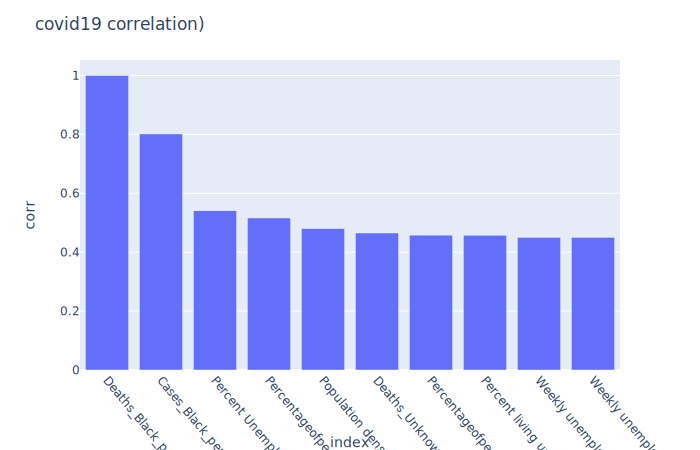

In [132]:
fig = px.bar(corr_death, x="index", y= "corr_value").update_xaxes(categoryorder="max descending").update_layout(xaxis_tickangle = 50, 
                  title = 'covid19 correlation)',
                  yaxis_title="corr")                  
fig.show()

In [133]:
corr_cases=dict(policy_race_census_clean.corr()['Cases_Black_percent'].abs().sort_values(ascending = False)[:10])
corr_cases=pd.DataFrame.from_dict(corr_cases,orient='index',
                       columns=['corr_value'])
corr_cases=corr_cases.reset_index()

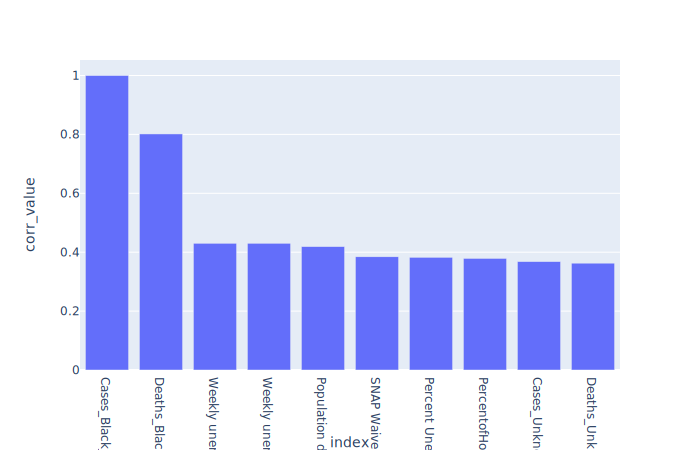

In [134]:
fig = px.bar(corr_cases, x='index', y='corr_value')
fig.show()

In [135]:
policy_race_census.head()

,State_x,State Abbreviation,State FIPS Code,Paid sick leave,Medicaid Expansion,Population density per square miles,Population 2018,Square Miles,Number Homeless (2019),Percent Unemployed (2018),Percent living under the federal poverty line (2018),Percent at risk for serious illness due to COVID,All-cause deaths 2018,Date closed K-12 schools,Closed day cares,Date banned visitors to nursing homes,Closed non-essential businesses,Closed restaurants except take out,Closed gyms,Closed movie theaters,Closed Bars,State of emergency,Stay at home/ shelter in place,Religious Gatherings Exempt Without Clear Social Distance Mandate*,End/relax stay at home/shelter in place,Began to reopen businesses statewide,Reopen restaurants,Initially reopen restaurants for outdoor dining only,Reopened gyms,Reopened movie theaters,Reopened hair salons/barber shops,Reopen non-essential construction,Reopen Religious gatherings,Reopen non-essential retail,Reopen bars,Reopen Childcare,Resumed elective medical procedures,Begin to Re-Close Bars,Re-Close Bars (statewide),Re-Close Movie Theaters (statewide),Re-Close Gyms (statewide),Re-Close Indoor Dining (Statewide),Mandate face mask use by all individuals in public spaces,Face mask mandate enforced by fines,Face mask mandate enforced by criminal charge/citation,No legal enforcement of face mask mandate,Mandate face mask use by employees in public-facing businesses,Mandate quarantine for those entering the state from specific states,Mandate quarantine for all individuals entering the state from another state,Alcohol/Liquor Stores Open,Allow restaurants to sell takeout alcohol,Allow restaurants to deliver alcohol,Keep Firearms Sellers Open,Stop Initiation of Evictions overall or due to COVID related issues,Stop enforcement of evictions overall or due to COVID related issues,Renter grace period or use of security deposit to pay rent,Order freezing utility shut offs,Froze mortgage payments,Lift Eviction Moratorium,"Prior to pandemic, no state unemployment waiting period; or date waiting period waived not found",Waived one week waiting period for unemployment insurance,Waive work search requirement for unemployment insurance,Expand eligibility of unemployment insurance to anyonewho is quarantined and/or taking care of someone who is quarantined,Expand eligibility to high-risk individuals in preventative quarantine,Expand eligibility of unemployment insurance to those who have lost childcare/school closures,Extend the amount of time an individual can be on unemployment insurance,Weekly unemployment insurance maximum amount (dollars),"Weekly unemployment insurance maximum amount with extra stimulus (through July 21, 2020) (dollars)",Unemployment insurance maximum duration (weeks),Unemployment insurance maximum duration with Pandemic Emergency Unemployment Compensation CARES extension (weeks),SNAP Waiver-Emergency Allotments to Current SNAP Households,SNAP Waiver-Pandemic EBT,SNAP Waiver-Temporary Suspension of Claims Collection,2020 Q1 SNAP ABAWD Time Limit Waiver,Modify Medicaid requirements with 1135 waivers (date of CMS approval),Reopened ACA enrollment using a special enrollment period,State previously allowed audio-only telehealth,Allow audio-only telehealth,Allow/expand Medicaid telehealth coverage,State had CHIP premium non-payment lock-out period as of January 2019,Supend CHIP premium non-payment lock-outs,Suspended elective medical/dental procedures,Made Effort to Limit Abortion Access,Stopped personal visitation in state prisons,Stopped in-person attorney visits in state prisons,Does not charge copays for incarcerated individuals,Waived COVID/respiratory illness-related copays during pandemic for incarcerated individuals,Waived all copays during pandemic for incarcerated individuals,Did not waive copays for incarcerated individuals,Use of telemedicine/telephone evaluations to initiate buprenorphine prescribing,Patients can receive 14-28 take-home doses of opioid medication,Home delivery of take-home medicati

# Visualizations by State

In [136]:
policy_race_census.head()

,State_x,State Abbreviation,State FIPS Code,Paid sick leave,Medicaid Expansion,Population density per square miles,Population 2018,Square Miles,Number Homeless (2019),Percent Unemployed (2018),Percent living under the federal poverty line (2018),Percent at risk for serious illness due to COVID,All-cause deaths 2018,Date closed K-12 schools,Closed day cares,Date banned visitors to nursing homes,Closed non-essential businesses,Closed restaurants except take out,Closed gyms,Closed movie theaters,Closed Bars,State of emergency,Stay at home/ shelter in place,Religious Gatherings Exempt Without Clear Social Distance Mandate*,End/relax stay at home/shelter in place,Began to reopen businesses statewide,Reopen restaurants,Initially reopen restaurants for outdoor dining only,Reopened gyms,Reopened movie theaters,Reopened hair salons/barber shops,Reopen non-essential construction,Reopen Religious gatherings,Reopen non-essential retail,Reopen bars,Reopen Childcare,Resumed elective medical procedures,Begin to Re-Close Bars,Re-Close Bars (statewide),Re-Close Movie Theaters (statewide),Re-Close Gyms (statewide),Re-Close Indoor Dining (Statewide),Mandate face mask use by all individuals in public spaces,Face mask mandate enforced by fines,Face mask mandate enforced by criminal charge/citation,No legal enforcement of face mask mandate,Mandate face mask use by employees in public-facing businesses,Mandate quarantine for those entering the state from specific states,Mandate quarantine for all individuals entering the state from another state,Alcohol/Liquor Stores Open,Allow restaurants to sell takeout alcohol,Allow restaurants to deliver alcohol,Keep Firearms Sellers Open,Stop Initiation of Evictions overall or due to COVID related issues,Stop enforcement of evictions overall or due to COVID related issues,Renter grace period or use of security deposit to pay rent,Order freezing utility shut offs,Froze mortgage payments,Lift Eviction Moratorium,"Prior to pandemic, no state unemployment waiting period; or date waiting period waived not found",Waived one week waiting period for unemployment insurance,Waive work search requirement for unemployment insurance,Expand eligibility of unemployment insurance to anyonewho is quarantined and/or taking care of someone who is quarantined,Expand eligibility to high-risk individuals in preventative quarantine,Expand eligibility of unemployment insurance to those who have lost childcare/school closures,Extend the amount of time an individual can be on unemployment insurance,Weekly unemployment insurance maximum amount (dollars),"Weekly unemployment insurance maximum amount with extra stimulus (through July 21, 2020) (dollars)",Unemployment insurance maximum duration (weeks),Unemployment insurance maximum duration with Pandemic Emergency Unemployment Compensation CARES extension (weeks),SNAP Waiver-Emergency Allotments to Current SNAP Households,SNAP Waiver-Pandemic EBT,SNAP Waiver-Temporary Suspension of Claims Collection,2020 Q1 SNAP ABAWD Time Limit Waiver,Modify Medicaid requirements with 1135 waivers (date of CMS approval),Reopened ACA enrollment using a special enrollment period,State previously allowed audio-only telehealth,Allow audio-only telehealth,Allow/expand Medicaid telehealth coverage,State had CHIP premium non-payment lock-out period as of January 2019,Supend CHIP premium non-payment lock-outs,Suspended elective medical/dental procedures,Made Effort to Limit Abortion Access,Stopped personal visitation in state prisons,Stopped in-person attorney visits in state prisons,Does not charge copays for incarcerated individuals,Waived COVID/respiratory illness-related copays during pandemic for incarcerated individuals,Waived all copays during pandemic for incarcerated individuals,Did not waive copays for incarcerated individuals,Use of telemedicine/telephone evaluations to initiate buprenorphine prescribing,Patients can receive 14-28 take-home doses of opioid medication,Home delivery of take-home medicati

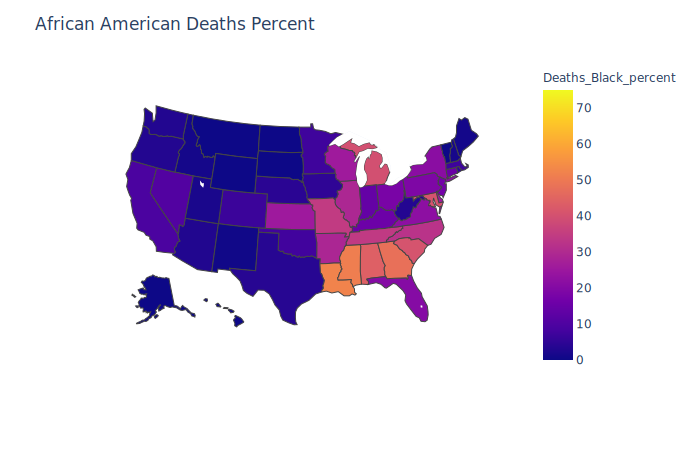

In [137]:
import plotly.express as px  # Be sure to import express
fig = px.choropleth(policy_race_census,  # Input Pandas DataFrame
                    locations="State Abbreviation",  # DataFrame column with locations
                    color="Deaths_Black_percent",  # DataFrame column with color values
                    hover_name="Deaths_Black_percent", # DataFrame column hover info
                    locationmode = 'USA-states').update_layout(
                    title_text = 'African American Deaths Percent', 
                    geo_scope='usa')
fig.show()  

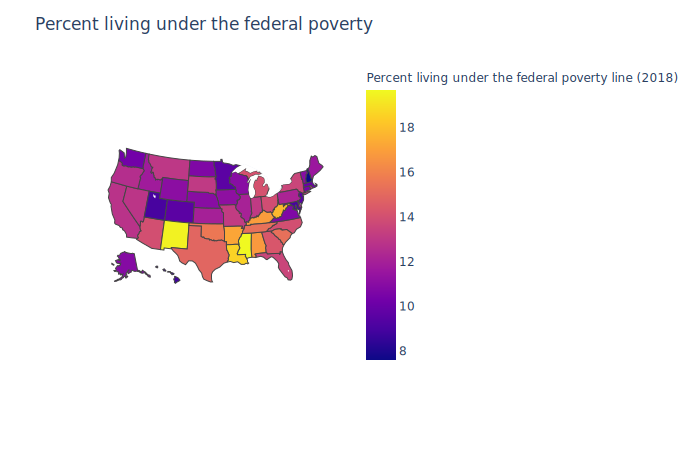

In [138]:
fig = px.choropleth(policy_race_census,  # Input Pandas DataFrame
                    locations="State Abbreviation",  # DataFrame column with locations
                    color="Percent living under the federal poverty line (2018)",  # DataFrame column with color values
                    hover_name="Percent living under the federal poverty line (2018)", # DataFrame column hover info
                    locationmode = 'USA-states').update_layout(
    title_text = 'Percent living under the federal poverty', # Create a Title
    geo_scope='usa',  # Plot only the USA instead of globe
)
fig.show()  # Output the plot to the screen

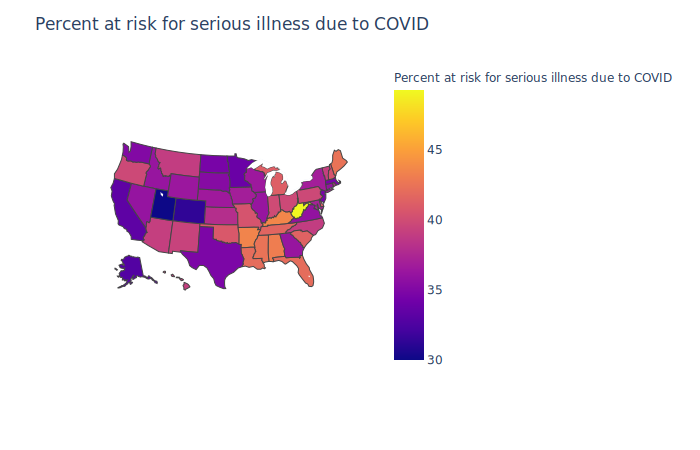

In [139]:
fig = px.choropleth(policy_race_census,  # Input Pandas DataFrame
                    locations="State Abbreviation",  # DataFrame column with locations
                    color="Percent at risk for serious illness due to COVID",  # DataFrame column with color values
                    hover_name="Percent at risk for serious illness due to COVID", # DataFrame column hover info
                    locationmode = 'USA-states').update_layout(title_text = 'Percent at risk for serious illness due to COVID', # Create a Title
                   geo_scope='usa')
fig.show()  # Output the plot to the screen

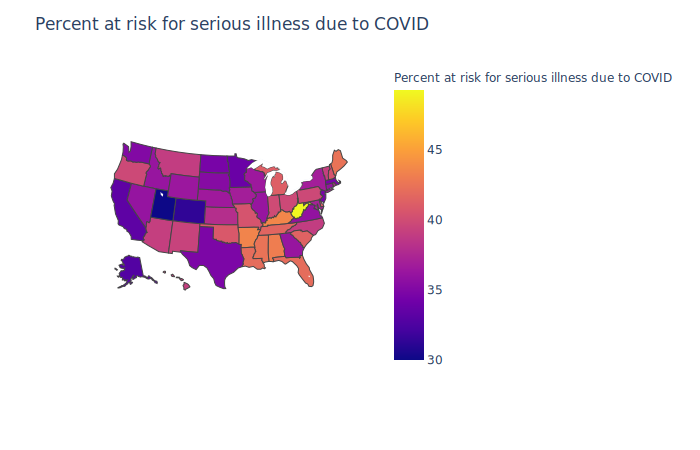

In [140]:
fig = px.choropleth(policy_race_census,  # Input Pandas DataFrame
                    locations="State Abbreviation",  # DataFrame column with locations
                    color="Percent at risk for serious illness due to COVID",  # DataFrame column with color values
                    hover_name="Percent at risk for serious illness due to COVID", # DataFrame column hover info
                    locationmode = 'USA-states').update_layout(title_text = 'Percent at risk for serious illness due to COVID', # Create a Title
                    geo_scope='usa')
fig.show()  # Output the plot to the screen